# CSC 177  Twitter (USA 2016 Presidential Election Data Extraction)
# Dr. Haiquan Chen
### Team members: Ehsan Hosseinzadeh  Khaligh, Shah Newaz, Tanveer Bariana

# 1. PreProcesing:

## 1.1 Display the data Column:

- First, you need to clean up the data. Each line of the file is a tweet. Throw away all tweets that are retweets (the text starts with RT), and from the text keep only the hashtags (words that start with #) and the handles (words that start with @). Create a “basket” for each tweet that contains at least one hashtag or handle.

In [212]:
import pandas as pd
import sklearn.cluster as sk_cluster

pd.set_option('display.max_colwidth', -1)
column_names = ['Name', 'ScreenName', 'UserID', 'FollowersCount', 'FriendsCount', 'Location', 'Description', 'CreatedAt', 'StatusID', 'Language', 'Place', 'RetweetCount', 'FavoriteCount', 'Text']

In [51]:
data_xaa = pd.read_table("data/clinton_trump_tweets.txt", header=None, names=column_names, encoding='ISO-8859-1', dtype='str')
data_xaa.head()

Name       ScreenName      UserID FollowersCount  \
0  Cebel                 Cebel6           1519696717  132             
1  Cookie                Cookiemuffen     109945090   2154            
2  nolaguy               nolaguy_phd      1450086582  797             
3  Mark Hager            marksnark        167177185   204             
4  Capitalist Creations  aaronjhoddinott  1191022351  775             

  FriendsCount               Location  \
0  263          Little Rock, Arkansas   
1  2034         The American South      
2  1188         NaN                     
3  448          Pittsburgh              
4  154          Canada                  

                                                                                                                                                      Description  \
0  Arkansas Razorback Fan Just trying to be #Uncommon one 1-0 day at a time.                                                                                        
1  Got married after college. I don't regret starting a family instead of grad school. Proud Deplorable                                                             
2  An LSU Ph.D student living in New Orleans, trying to find a second act.                                                                                          
3  Hip, trendy, smart, funny, fit, lobbyist. U? Boilerplate: these thoughts are my own, not anyone else's. Hmmmkay?                                                 
4  Entrepreneur, startup investor, political junkie, free market supporter, beer connoisseur, dad and dog lover. Also a golf enthusiast despite my lack of skill.   

                       CreatedAt            StatusID Language Place  \
0  Sat Oct 29 08:10:06 EEST 2016  792232017094119425  en       null   
1  Wed Oct 26 18:44:08 EEST 2016  791304413923213312  en       null   
2  Sat Oct 29 21:53:29 EEST 2016  792439227090767872  en       null   
3  Wed Oct 26 00:33:20 EEST 2016  791029904733331457  en       null   
4  Fri Oct 28 05:05:10 EEST 2016  791823089700962304  en       null   

  RetweetCount FavoriteCount  \
0  0            1              
1  1937         0              
2  0            0              
3  891          0              
4  7            0              

                                                                                                                                           Text  
0  @NWAJimmy I've read it now though brother. Was pretty spot on Lots of bright spots but a lot to work on. Exactly as an exhibition should be!  
1  RT @wikileaks: New poll puts Pirate Party on course to win Iceland's national elections on Saturday. https://t.co/edTqjeJaQ6                  
2  @gaystoner821 I think New Orleans spoiled me with food. I need to try and branch out in BR.                                                   
3  RT @LOLGOP: ACA needs fixes but know da facts:  *70% can get covered in marketplaces for under $75/month  *Hikes affect 3% *GOP will uninsu   
4  RT @FastCompany: Alphabet shares soar on better-than-expected earnings as mobile video strategy pays off https://t.co/bokbXngMJt https://t.

- number of rows and columns

In [3]:
print(data_xaa.shape)

(5250980, 14)


- Display Data Types

In [4]:
data_xaa.dtypes

Name              object
ScreenName        object
UserID            object
FollowersCount    object
FriendsCount      object
Location          object
Description       object
CreatedAt         object
StatusID          object
Language          object
Place             object
RetweetCount      object
FavoriteCount     object
Text              object
dtype: object

- Cleaned data does not contain RT and contains # or @

In [3]:
data_xaa["RT"] = data_xaa["Text"].str.startswith("RT", na=False)
data_xaa["Hash Bool"] = data_xaa["Text"].str.contains("#") | data_xaa["Text"].str.contains("@")

dataCleaned = data_xaa[(~data_xaa["RT"]) & (data_xaa["Hash Bool"])]

#dataCleaned.dtypes
dataCleaned.head()

Name       ScreenName      UserID FollowersCount  \
0   Cebel              Cebel6           1519696717  132             
2   nolaguy            nolaguy_phd      1450086582  797             
6   David Walling      davidjwalling    106568768   975             
12  Alexandria Taylor  twentythreeofme  163712593   1342            
13  Harry Binford      CaptainNormal    2447279666  895             

   FriendsCount               Location  \
0   263          Little Rock, Arkansas   
2   1188         NaN                     
6   2781         Dallas, TX              
12  1346         Portland, Oregon        
13  1224         USA                     

                                                                                                                                                   Description  \
0   Arkansas Razorback Fan Just trying to be #Uncommon one 1-0 day at a time.                                                                                    
2   An LSU Ph.D student living in New Orleans, trying to find a second act.                                                                                      
6   Bloodletting secure algorithms close to the bone. #HealthIT security matters. Opinions my own. https://t.co/Dcpe6FteOq                                       
12  Activist | Creator | Educator | #FemTube Host | Passion Project: #DisabilitiesOnYT Panels | Want to participate? https://t.co/IYy6JVqmo5                     
13  Proud Christian husband, frequent shooting range attendee, and former law enforcement. Lifetime member of the NRA. Pro-life, Jesus is Lord. America first.   

                        CreatedAt            StatusID Language  \
0   Sat Oct 29 08:10:06 EEST 2016  792232017094119425  en        
2   Sat Oct 29 21:53:29 EEST 2016  792439227090767872  en        
6   Sat Oct 29 00:16:48 EEST 2016  792112907488079872  en        
12  Tue Oct 25 19:41:52 EEST 2016  790956555030061056  en        
13  Thu Oct 27 21:44:44 EEST 2016  791712249685676032  en        

                                                                                                                                                                                                                                                                                                                                                                                                Place  \
0   null                                                                                                                                                                                                                                                                                                                                                                                                
2   null                                                                                                                                                                                                                                                                                                                                                                                                
6   null                                                                                                                                                                                                                                                                                                                                                                                                
12  PlaceJSONImpl{name='Washington', streetAddress='null', countryCode='US', id='bc3a38d3d5999b4b', country='United States', placeType='admin', url='https://api.twitter.com/1.1/geo/id/bc3a38d3d5999b4b.json', fullName='Washington, USA', boundingBoxType='Polygon', boundingBoxCoordinates=[[Ltwitter4j.GeoLocation;@5ad5215f], geometryType='null', geometryCoordinates=null, containedWithIn=[]}   
13  null      

## 1.2  Iterative Pruning:

- Do iterative pruning so that we only keep the users that have used at least 20 distinct hashtags/handles, and the hashtags/handles that have been used by at least 20 distinct users or 20 tweets. In this project, we will also use the frequency with which a user uses a hashtag/handle (i.e., how many times a user uses a hashtag/handle).

In [5]:
def filterHashtagsHandles(string):
    strList = []
    for i in string.split():
        if i.startswith("#") or i.startswith("@"):
            #strList.append(i.lower()) # for dic() use.
            strList.append(i)
               
    if  len(strList) >= 20:
        return strList
    else:
        return "listSize<20"

In [6]:
dataCleaned["HashHandles"] = dataCleaned["Text"].apply(filterHashtagsHandles)
dataCleanedHashMoreThan20 = dataCleaned[dataCleaned.HashHandles != "listSize<20"]
dataCleanedHashMoreThan20.head()

/Users/Ehsan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Name       ScreenName      UserID FollowersCount FriendsCount  \
2232   Colleen Allen  Colleen_Allen14  1561696464  292            1180          
4801   USGLC          USGLC            15603311    8991           3280          
6790   Tina Spargo    MaxwellsMom      16485488    102            122           
7537   James Gaffney  jamesgaffney     23535896    1280           2919          
17206  Heath Lewis    Heath_Lewis      14578107    630            551           

                  Location  \
2232   Seattle, Washington   
4801   Washington, DC        
6790   Boston-ish            
7537   Limerick              
17206  St. Paul, MN          

                                                                                                                                                            Description  \
2232   School Psychologist  Social Justice  Feminism  Education  Books  Leadership  Soccer  Vegetarian/Vegan Cooking  Nature  German Shepherds                            
4801   The U.S. Global Leadership Coalition unites business, military, faith, and political leaders to strengthen U.S. investments in global development and diplomacy.   
6790   NaN                                                                                                                                                                
7537   NaN                                                                                                                                                                
17206  Husband | Director of Christian Education | Professor at @ConcordiaStPaul | @GonzagaU @Gonzaga_ORGL and @CUNE Alum | Concert Promoter | Former Pro Hockey Scout    

                           CreatedAt            StatusID Language  \
2232   Sun Oct 30 23:53:14 EET 2016   792846850185236480  en        
4801   Wed Oct 26 20:48:19 EEST 2016  791335665497731072  en        
6790   Sat Oct 29 21:12:57 EEST 2016  792429027512422400  en        
7537   Fri Oct 28 11:01:22 EEST 2016  791912731754557440  en        
17206  Sat Oct 29 18:23:34 EEST 2016  792386403011219456  en        

                                                                                                                                                                                                                                                                                                                                                                                           Place  \
2232   null                                                                                                                                                                                                                                                                                                                                                                                        
4801   null                                                                                                                                                                                                                                                                                                                                                                                        
6790   null                                                                                                                                                                                                                                                                                                                                                                                        
7537   null                                                                                                                                                                                                                                                                                                                                                       

In [7]:
filterColumnRequired = dataCleanedHashMoreThan20[['Name','UserID', 'HashHandles']]
filterColumnRequired.head()

Name      UserID  \
2232   Colleen Allen  1561696464   
4801   USGLC          15603311     
6790   Tina Spargo    16485488     
7537   James Gaffney  23535896     
17206  Heath Lewis    14578107     

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            HashHandles  
2232   [@WDFx2EU7:, @IsraelHayomEng:, @UNESCO, #gunsense,, #humanrights, #LGBTQStraightally, #vegan, #addict, #UniteBlue, @DavidCornDC:, @realDonaldTrump!, #MAGA!, @Drbillsawyer:, @BenjySarlin:, @SteveKopack:, @peterdaou:, @realDonaldTrump, #SaveAgentCarter, #I'mWithHer, @mmurraypolitics:, @col_nj:, #wednesday, @paulkrugman:, @BringerOfRain88:, #DNCleak, #BernieMustDisavow, @p_cattt, @AndyWHumphreys:, @D, @realDonaldTrump:, #VoteBLUE, #p2, #Utah, #Trumps, #McMullin, #NeverTrump, @hammertime1009:, @Aderpt_, @Jerusalem_Post:, #BreakingNews, #ROOKIEBLUE, #MCSWAREK, #BenBass, #ChicagoFire, #Dawsey, #ChicagoPD, #Linstead, #GH, #Lante, #TML, @gaellicious, @Justicerocks11, @BlackhawkDesign, @realDonaldTrump:, @TEN_GOP:, #Thurs]                                                                                                                                                                                                                                                                                                                                                                                                               
4801   [@USAID., @SenatorDurbin, @LindseyGrahamSC, #usglcil, @WWE,The, @Patriots., @AACenter, @DallasStars, @AnaheimDucks, @truly_gifted3:, @TeamTrump:, #DrainTheSwamp, @Windows_support, @LiveEUDebate, @walt_griffin:, @SCPSInfo, @7500toHolte, @washingtonpost:, @mortreport, #radio, #pets, #host, @gauravcsawant:, #danacortezshow, @TheBeat985:, @malalunafest!, @igorvolsky:, #gunlicen, @DaniBurlison:, @HuffPostBlog, @HuffPostP, @baandek:, #Montessori, @MomsDemand,, @Everytown, @EmergeAmerica, @ksatnews:, #KSATnews, @NealSchaffer:, @webby2001, @candemountain:, @KazmierskiR, @lizh7717, @KellyannePolls:, @HillaryClinton, #MAGA, #Trump2016, @artwingcon:, #MAGA3X, @jasonmazier, @Inc, #seo, #contentmarketing, @jwyattsports:, @Titans,, @Show19ine, @Jaguars, @jalenramsey]                                                                                                                                                                                                                                                                                                                                                                       
6790   [#NCSU, #DIY, #foreclosuretohome, @NellosSauce., #WeAreNotThis, #Halloween, #DreamCreateInspire, #recipe, #ImWithHer, #NeverHitlerTrump, #ProSaneDemocrats, @hill55willie:, @Reds:, @ZVincej..., #imwithher, #estoyconella, @2016Opinion:, @pnehlen:, @GartrellLinda:, #BernieSanders, #RIPVine, @JIKOOKDAILY:, @Undented, #ewpopfest, #ghostbusters, @fragilechildTX:, #protectTXfragilekids, @TVlocationguide, @

In [8]:
groupedUserIDs = filterColumnRequired.groupby(['UserID']).sum()

#groupedUserIDs.dtypes
#groupedUserIDs.shape
groupedUserIDs.head()

Name  \
UserID                             
1000273868  Mark Harmon            
1004887885  Right to Food, India   
10084232    Deplorable Realtor     
100888538   BharataBhagyaVidhata   
101193997   Brad Rush              

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           HashHandles  
UserID                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
1000273868  [@jobs4LAX:, #jobs4u, #jobs, #LA, #LAX, #losangeles, #CA, @EPSHERIFF:, #FindingPrinceCharming, @MrsBodington:, @BernieSanders, #PodestaEmails22, @wikileaks, #ClintonEmails, #WeinerGate, #Clinton, @Bencjacobs:, @AndyRichter:, @iowa_guy44, @DoringHaak, @mitchellvii, #LGBTQ, #Disability, @tealashes, #Trump, #MAGA, #BasketofDeplorables, #DNCLeaks, #CrookedHillary, #FACEPALM:, @AllenWest, @vickyd_28, @BraddJaffy:, @AnthonyNBCNews, @Neiloosh:, @LSESU_PalSoc, @HenMazzig]                                                                                                                                                                                                                                                                                                        
1004887885  [#hunger, @JonAntoine, @ScarletDeeva:, @JonAntoine, #Believe, #commercial, #realestate, #lawfirm, #Ohio, #Kentucky., #lawyer, #titleinsurance, #cre, #Thomas:, @McClatchyDC, #SCOTUS, @CreatiVixMedia., @HuffingtonPost,, @LevoLeague, @MuckRack, @SoulCycle, @super_markette:, @greatdaywash., #money, @deloittedigital., @Warriors, @bleacherreport., #dubnation!, @WSJ, @DanScavino, @megynkelly, @realDonaldTrump, @eddiesteadyno:, @MuslimIQ:, @DonaldJTrumpJr, @WWE,The, @Patriots., #HellinACell2013, @AJBrooks, #505, @realDonaldTrump:, @YahooForde, @wyo_football, #GoWyo, @DogHouse_Games:, #DonaldJThump, #NeverTrump, @Holbornlolz:, @girlposts:, #RIPVine]                                                                                                                    
10084232    [#TheKrewe., @bbeaulieu, @chrislhayes:, @DavidZelcer, @Kragar_LGF:, @BreitbartNews:, @Cubs:, #FlyTheW, #prison,, #success?, #GoBue, @, @theresa_may, @CNN, #BabyBoomer, #NeverTrump, #BLM, #ImWithHer, #LoveTrumpsHate, @mcspocky:]                                                                                                                                                                                                                                                                                                                                                                                                                                            

- the users that have used at least 20 distinct hashtags/handles in each row

In [9]:
def uniqueHashHandEachTweets(list1):
    unique_list = []
     
    for x in list1:
        if x not in unique_list:
            unique_list.append(x)

    if  len(unique_list) >= 20:
        return len(unique_list)
    else:
        return "LessThan20UniqueItems"

In [10]:
groupedUserIDs["NumberHashHandlesM20Unique"] = groupedUserIDs["HashHandles"].apply(uniqueHashHandEachTweets)
dataHashMoreThan20UniqueItems = groupedUserIDs[groupedUserIDs.HashHandles != "LessThan20UniqueItems"]
dataHashMoreThan20UniqueItems.head()

Name  \
UserID                             
1000273868  Mark Harmon            
1004887885  Right to Food, India   
10084232    Deplorable Realtor     
100888538   BharataBhagyaVidhata   
101193997   Brad Rush              

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           HashHandles  \
UserID                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
1000273868  [@jobs4LAX:, #jobs4u, #jobs, #LA, #LAX, #losangeles, #CA, @EPSHERIFF:, #FindingPrinceCharming, @MrsBodington:, @BernieSanders, #PodestaEmails22, @wikileaks, #ClintonEmails, #WeinerGate, #Clinton, @Bencjacobs:, @AndyRichter:, @iowa_guy44, @DoringHaak, @mitchellvii, #LGBTQ, #Disability, @tealashes, #Trump, #MAGA, #BasketofDeplorables, #DNCLeaks, #CrookedHillary, #FACEPALM:, @AllenWest, @vickyd_28, @BraddJaffy:, @AnthonyNBCNews, @Neiloosh:, @LSESU_PalSoc, @HenMazzig]                                                                                                                                                                                                                                                                                                         
1004887885  [#hunger, @JonAntoine, @ScarletDeeva:, @JonAntoine, #Believe, #commercial, #realestate, #lawfirm, #Ohio, #Kentucky., #lawyer, #titleinsurance, #cre, #Thomas:, @McClatchyDC, #SCOTUS, @CreatiVixMedia., @HuffingtonPost,, @LevoLeague, @MuckRack, @SoulCycle, @super_markette:, @greatdaywash., #money, @deloittedigital., @Warriors, @bleacherreport., #dubnation!, @WSJ, @DanScavino, @megynkelly, @realDonaldTrump, @eddiesteadyno:, @MuslimIQ:, @DonaldJTrumpJr, @WWE,The, @Patriots., #HellinACell2013, @AJBrooks, #505, @realDonaldTrump:, @YahooForde, @wyo_football, #GoWyo, @DogHouse_Games:, #DonaldJThump, #NeverTrump, @Holbornlolz:, @girlposts:, #RIPVine]                                                                                                                     
10084232    [#TheKrewe., @bbeaulieu, @chrislhayes:, @DavidZelcer, @Kragar_LGF:, @BreitbartNews:, @Cubs:, #FlyTheW, #prison,, #success?, #GoBue, @, @theresa_may, @CNN, #BabyBoomer, #NeverTrump, #BLM, #ImWithHer, #LoveTrumpsHate, @mcspocky:]                                                                                                                                                                                                                                                                                                                                                                                                                                        

- The hashtags/handles that have been used by at least 20 distinct users or 20 tweets.

In [11]:
def uniqueHashHandUsedBy20DistUsers(list1):  
        s = pd.Series(list1)
        x = pd.to_numeric(s, errors='ignore')
        print(x)   

In [12]:
groupedUserIDs["uniqueHashHandUsedBy20DistUsers"] = groupedUserIDs["HashHandles"].apply(uniqueHashHandUsedBy20DistUsers)

0     @jobs4LAX:            
1     #jobs4u               
2     #jobs                 
3     #LA                   
4     #LAX                  
5     #losangeles           
6     #CA                   
7     @EPSHERIFF:           
8     #FindingPrinceCharming
9     @MrsBodington:        
10    @BernieSanders        
11    #PodestaEmails22      
12    @wikileaks            
13    #ClintonEmails        
14    #WeinerGate           
15    #Clinton              
16    @Bencjacobs:          
17    @AndyRichter:         
18    @iowa_guy44           
19    @DoringHaak           
20    @mitchellvii          
21    #LGBTQ                
22    #Disability           
23    @tealashes            
24    #Trump                
25    #MAGA                 
26    #BasketofDeplorables  
27    #DNCLeaks             
28    #CrookedHillary       
29    #FACEPALM:            
30    @AllenWest            
31    @vickyd_28            
32    @BraddJaffy:          
33    @AnthonyNBCNews       
34    @Neiloos

0     @realDonaldTrump:   
1     #ICYMI:             
2     #DrainTheSwamp      
3     @hillcrestcook      
4     @PhelpsieSarah      
5     @AngelicaYvette:    
6     #NorthCarolina      
7     @HillaryClinton     
8     @MichelleObama      
9     #FANGIRLINGSOHARD   
10    @MTV                
11    @CraigSJ            
12    @etribune           
13    @RKalland           
14    #DataAnalytics,     
15    #infographics,      
16    #illustrations,     
17    #images             
18    #bloggs,            
19    #websites,          
20    #socialmedia.       
21    #content.           
22    #socialmediasupport.
23    #smile              
24    #Halloween          
25    #Infographic        
26    #autism,            
27    @HillaryforNV       
28    @NVDems             
29    @HillaryClinton     
30    @RalstonReports:    
31    @NintendoAmerica:   
32    #NationalPumpkinDay 
33    @JoyAnnReid:        
34    @MSignorile:        
35    @RealHeatherRoss:   
36    @ENSS               
3

dtype: object
0     @maeveminx            
1     @HillaryClinton:      
2     @ajaxdailydotcom      
3     #14                   
4     @ikbensjimmie         
5     @ellisdouglas_        
6     @yaya_ajax            
7     #quote                
8     @tradegovuk.          
9     @intranetizen.        
10    @300_seconds.         
11    @TCM                  
12    @FilmStruck           
13    @Cal                  
14    @academy_of_art       
15    #Noirvember,          
16    #AYearWithWomen,      
17    #FemaleFilmmakerFriday
18    @SassyPantsjj:        
19    @Cutiep               
20    @Cernovich:           
21    #BoycottNFL           
22    @KhyraDaDon:          
23    #BBOTT                
24    #neverhillary         
25    @PoliticsNewsUS4:     
26    #ImwithHer            
27    @DavidCornDC:         
28    @daveweigel:          
29    @DanaPerino           
30    @Tom_Winter:          
31    @realDonaldTrump:     
32    #DrainTheSwamp        
33    @oldpicsarchive:      


In [13]:
columnNames = ["Number", "HashHan"]
dataM20T = pd.read_table("data/Filt20T.txt", sep='\s+',header=None, names=columnNames, encoding='ISO-8859-1', dtype='str')

In [14]:
columnHashHanFilter = dataM20T[["HashHan"]]
columnHashHanFilter.head()

HashHan
0  @jobs4LAX:
1  #jobs4u   
2  #jobs     
3  #LA       
4  #LAX

In [15]:
ValueCountCleanedHashHands = columnHashHanFilter.HashHan.value_counts() >= 20
ValueCountCleanedHashHandsIndexed = ValueCountCleanedHashHands.index

#print(ValueCountCleanedHashHandsIndexed)
ValueCountCleanedHashHands.head()

#ImWithHer          True
#MAGA               True
@HillaryClinton     True
@realDonaldTrump    True
@                   True
Name: HashHan, dtype: bool

- (The users that have used at least 20 distinct hashtags/handles) & (The hashtags/handles that have been used by at least 20 distinct users or 20 tweets)


In [19]:
def checkBothCondtionsOfFilter20T(list1):
    for x in list1:
        if x in ValueCountCleanedHashHandsIndexed:
            return "True"
        else:
            return "False"   

In [20]:
dataHashMoreThan20UniqueItems["satisfyBothCond"] = dataHashMoreThan20UniqueItems["HashHandles"].apply(checkBothCondtionsOfFilter20T)
satisfyBothCond = dataHashMoreThan20UniqueItems[dataHashMoreThan20UniqueItems.satisfyBothCond == "True"]

#satisfyBothCond.shape
#satisfyBothCond.head()

- Index the userIds we need to compare with Trump_Hilaryclass in part 2 (ground truth) 

In [21]:
indexedSatisfyBothCondUserId = satisfyBothCond.index
print(indexedSatisfyBothCondUserId)

Index(['1000273868', '1004887885', '10084232', '100888538', '101193997',
       '1016135005', '102186159', '102337130', '1027437841', '1027974188',
       ...
       '2505220368', '25072125', '2507353321', '2511274210', '2511538188',
       '2511554220', '25144553', '251843881', '25203456', '2521541502'],
      dtype='object', name='UserID', length=539)


# 2. Clustering:

# Problem 1:


- Represent each hashtag/handle as a vector of integers with the number of occurrences of the hashtag/handle for each user. You can use the python libraries for feature extraction to construct this representation.

Indexing the HashHand column 

In [53]:
step1 = pd.Series(satisfyBothCond['HashHandles'].apply(pd.Series).stack().reset_index(1, drop=True), name='HH')
step2 = satisfyBothCond.join(step1).drop('HashHandles', axis=1).rename(columns={'HH': 'HashHandles'})
step3 = pd.get_dummies(step2, columns=['HashHandles'])
satisfyBothCond_dummies = (step3).groupby('UserID', as_index=True).sum() #If we set as_index=True, it displays the userID 

satisfyBothCond_dummies_rotate = satisfyBothCond_dummies.T

satisfyBothCond_dummies_rotate.head()

UserID                            1000273868  1004887885  10084232  100888538  \
HashHandles_#                     0           0           0         0           
HashHandles_##Houdini             0           0           0         0           
HashHandles_##voteblue.           0           0           0         0           
HashHandles_##wheredoesthetimego  0           0           0         0           
HashHandles_#$27                  0           0           0         0           

UserID                            101193997  1016135005  102186159  102337130  \
HashHandles_#                     0          0           0          0           
HashHandles_##Houdini             0          0           0          0           
HashHandles_##voteblue.           0          0           0          0           
HashHandles_##wheredoesthetimego  0          0           0          0           
HashHandles_#$27                  0          0           0          0           

UserID                            1027437841  1027974188     ...      \
HashHandles_#                     0           0              ...       
HashHandles_##Houdini             0           0              ...       
HashHandles_##voteblue.           0           0              ...       
HashHandles_##wheredoesthetimego  0           0              ...       
HashHandles_#$27                  0           0              ...       

UserID                            2505220368  25072125  2507353321  \
HashHandles_#                     1           0         0            
HashHandles_##Houdini             0           0         0            
HashHandles_##voteblue.           0           0         0            
HashHandles_##wheredoesthetimego  0           0         0            
HashHandles_#$27                  0           0         0            

UserID                            2511274210  2511538188  2511554220  \
HashHandles_#                     0           0           0            
HashHandles_##Houdini             0           0           0            
HashHandles_##voteblue.           0           0           0            
HashHandles_##wheredoesthetimego  0           0           0            
HashHandles_#$27                  0           0           0            

UserID                            25144553  251843881  25203456  2521541502  
HashHandles_#                     0         0          0         1           
HashHandles_##Houdini             0         0          0         0           
HashHandles_##voteblue.           0         0          0         0           
HashHandles_##wheredoesthetimego  0         0          0         0           
HashHandles_#$27                  0         0          0         0           

[5 rows x 539 columns]

- convert dummies to the list using numpy array 

In [61]:
satisfyBothCond_dummies_rotateList = satisfyBothCond_dummies_rotate.index.tolist()

#print(satisfyBothCond_dummies_rotateList)
print(len(satisfyBothCond_dummies_rotate))
print(type(satisfyBothCond_dummies_rotateList))

22322
<class 'list'>


- Apply the k-means algorithm. Create a plot of the SSE error of the k-means algorithm as a function of the number of clusters, for k up to 20, in order to determine the number of clusters. Run the k-means algorithm for the number that you will select, and examine manually the resulting clusters. From the hashtags/handles in each cluster, try to deduce what is the topic it concerns.

In [114]:
import sklearn.cluster as sk_cluster
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


prob1_kmeans = sk_cluster.KMeans(init='k-means++', n_clusters=20, n_init=10, max_iter=300)  
prob1_kmeans_fit_predict = prob1_kmeans.fit_predict(satisfyBothCond_dummies_rotate)

print(prob1_kmeans_fit_predict)

print ('\n Cluster Centroids')
prb1_centroids = prob1_kmeans.cluster_centers_
print (prb1_centroids)

print ('\nCluster labels')
prob1_kmeans_labels = prob1_kmeans.labels_
print(prob1_kmeans_labels)


print('\n')
prob1_error = prob1_kmeans.inertia_   #SSE; Sum of squared distances of samples to their closest cluster center.
print ("The total error of the clustering is: ", prob1_error)

[ 9  0  0 ...,  0  0 12]

 Cluster Centroids
[[  1.41936893e-03   2.18364450e-03   6.55093351e-04 ...,   4.91320013e-04
    1.91068894e-03   1.63773338e-03]
 [ -3.03576608e-18   3.46944695e-18  -2.38524478e-18 ...,  -4.33680869e-19
    2.81892565e-18  -4.77048956e-18]
 [  1.42857143e-01   1.42857143e-01   2.85714286e-01 ...,   2.85714286e-01
    2.16840434e-19   1.42857143e-01]
 ..., 
 [ -4.33680869e-18   4.77048956e-18   3.68628739e-18 ...,   1.62601626e-02
   -6.07153217e-18   7.37257477e-18]
 [ -2.16840434e-18   3.03576608e-18  -1.95156391e-18 ...,   2.38095238e-02
    2.16840434e-19  -3.90312782e-18]
 [ -3.46944695e-18   3.90312782e-18  -2.60208521e-18 ...,   2.16840434e-18
    5.20417043e-18  -5.20417043e-18]]

Cluster labels
[ 9  0  0 ...,  0  0 12]


The total error of the clustering is:  32533.4719571


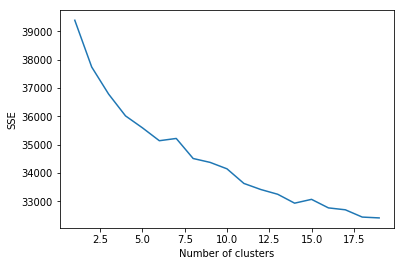

In [57]:
prob1_error_kmean = np.zeros(20)

for k in range(1,20):
    prob1_kmeans = sk_cluster.KMeans(init='k-means++', n_clusters=k, n_init=100, max_iter=300)  
    prob1_kmeans.fit_predict(satisfyBothCond_dummies_rotate)

    prob1_error_kmean[k] = prob1_kmeans.inertia_
    
plt.plot(range(1,20),prob1_error_kmean[1:])
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

- get top terms per cluster 

In [58]:
prob1_topKmeans = sk_cluster.KMeans(init='k-means++', n_clusters=11, n_init=100, max_iter=300)  
prob1_topKmeans.fit_predict(satisfyBothCond_dummies_rotate)

print(prob1_topKmeans.cluster_centers_)
asc_order_centroids = prob1_topKmeans.cluster_centers_.argsort()    # argsort() returns the indices that would sort an array.
print(asc_order_centroids)

des_order_centroids = asc_order_centroids[:,::-1]     #  get the indices in descending order
print(des_order_centroids)

[[  1.37806753e-03   2.12010389e-03   6.36031166e-04 ...,   5.83028568e-04
    1.90809350e-03   1.69608311e-03]
 [  2.40963855e-03   4.81927711e-03   1.20481928e-03 ...,   6.02409639e-03
    1.06251813e-17   2.40963855e-03]
 [  5.78871201e-03   4.34153401e-03   2.89435601e-03 ...,   8.68306802e-03
    4.34153401e-03   1.44717800e-03]
 ..., 
 [  3.33333333e-01   0.00000000e+00   3.33333333e-01 ...,   3.33333333e-01
   -2.16840434e-19   0.00000000e+00]
 [  1.11111111e-01   2.22222222e-01   1.11111111e-01 ...,   1.11111111e-01
    1.11111111e-01   2.22222222e-01]
 [ -4.33680869e-18   4.77048956e-18   2.73224044e-03 ...,   1.09289617e-02
   -5.85469173e-18   6.93889390e-18]]
[[288 331  90 ..., 109 276 515]
 [ 91 262 503 ..., 342 388 288]
 [235 118 268 ..., 515 388 342]
 ..., 
 [397 423 213 ..., 388 288 342]
 [174 383 161 ...,  90 288 342]
 [342 288 284 ..., 433 326 331]]
[[515 276 109 ...,  90 331 288]
 [288 388 342 ..., 503 262  91]
 [342 388 515 ..., 268 118 235]
 ..., 
 [342 288 388 ...

In [59]:
# first index the dummies dataframe and then convert to list 
terms = satisfyBothCond_dummies_rotate.index.tolist()
print(terms, '\n')
for i in range(11):
    print ("Cluster:", i)
    for ind in des_order_centroids[i, :]:
        print (terms[ind])
    print()

['HashHandles_#', 'HashHandles_##Houdini', 'HashHandles_##voteblue.', 'HashHandles_##wheredoesthetimego', 'HashHandles_#$27', 'HashHandles_#001', 'HashHandles_#1', 'HashHandles_#1!!!', 'HashHandles_#1)', 'HashHandles_#1,', 'HashHandles_#1.', 'HashHandles_#10', 'HashHandles_#1009,', 'HashHandles_#100Days100Ways', 'HashHandles_#100MostDamagingWIKILEAKS', 'HashHandles_#100YearsStrong!', 'HashHandles_#100daysoftri', 'HashHandles_#101daysofwomen', 'HashHandles_#10A', 'HashHandles_#10X', 'HashHandles_#10km3x2', 'HashHandles_#10x', 'HashHandles_#11', 'HashHandles_#11433', 'HashHandles_#11b.', 'HashHandles_#12', 'HashHandles_#12-4', 'HashHandles_#129!', 'HashHandles_#12Monkeys', 'HashHandles_#12s', 'HashHandles_#12weeksofChristmas', 'HashHandles_#13', 'HashHandles_#14', 'HashHandles_#15-PT', 'HashHandles_#157', 'HashHandles_#16States', 'HashHandles_#17', 'HashHandles_#184', 'HashHandles_#186', 'HashHandles_#1880sFemminist', 'HashHandles_#18th', 'HashHandles_#19', 'HashHandles_#1987', 'HashHand

HashHandles_#ArmyStrong
HashHandles_#505
HashHandles_#2ndCityLyric
HashHandles_##voteblue.
HashHandles_#BBLF
HashHandles_#AFP
HashHandles_#Baltimore
HashHandles_#AHCJ.
HashHandles_#AdamCapay
HashHandles_#AmericanFirst
HashHandles_#Auburn
HashHandles_#Anipals
HashHandles_#Apps
HashHandles_#ACA
HashHandles_#32
HashHandles_#America!
HashHandles_#Agribusiness

Cluster: 1
HashHandles_#Agribusiness
HashHandles_#Apps
HashHandles_#AmericanFirst
HashHandles_#BTHOnmsu
HashHandles_#America!
HashHandles_#Antijaphetism
HashHandles_#2016VoteBlue
HashHandles_#BIG10
HashHandles_#32
HashHandles_#7News
HashHandles_#Alhumdulillah
HashHandles_#50%
HashHandles_#ACA
HashHandles_#Action
HashHandles_#AnimalRights
HashHandles_#BUCN
HashHandles_#AeDilHaiMushkil
HashHandles_#AgentsOfSHIELD
HashHandles_#AboutLastNight
HashHandles_#Auswewant
HashHandles_#AntiGlobalism
HashHandles_#AMERICA
HashHandles_#AB
HashHandles_#50
HashHandles_#1A,
HashHandles_#1stJobFriday
HashHandles_#BREAKING:
HashHandles_#99c
HashHandles_

HashHandles_#AmericanMuslim
HashHandles_#AntiIndiaFront!
HashHandles_#APM
HashHandles_#AnthonyWeiner
HashHandles_#BCHS
HashHandles_#ABC730
HashHandles_#1880sFemminist
HashHandles_#ASU
HashHandles_#21stCenturyGenocide
HashHandles_#Bama,
HashHandles_#Abortion
HashHandles_#BBN
HashHandles_#5STAR
HashHandles_#1
HashHandles_#478
HashHandles_#Animal
HashHandles_#910
HashHandles_#12weeksofChristmas
HashHandles_#AsaKaftans
HashHandles_#10x
HashHandles_#ACFRE
HashHandles_#AAPtards.
HashHandles_#2016_Presidential_Race
HashHandles_#11433
HashHandles_#AK
HashHandles_#Alt007Titles
HashHandles_#101daysofwomen
HashHandles_#AMJoy
HashHandles_#BEYHIVE
HashHandles_#BROKEN
HashHandles_#AMAs
HashHandles_#30+
HashHandles_#77
HashHandles_#13
HashHandles_#AllLivesMatter,
HashHandles_#ApartandoCorruptos
HashHandles_#BPS
HashHandles_#Actor
HashHandles_#11
HashHandles_#Affiliates
HashHandles_#Backroad
HashHandles_#BallonDor
HashHandles_#2
HashHandles_#AshEra
HashHandles_#Australia
HashHandles_#America's
HashHan

HashHandles_#Auburn!!!
HashHandles_#Ambition's
HashHandles_#276
HashHandles_#America1st
HashHandles_#ABucketfulLife
HashHandles_#ArmyWife
HashHandles_#Ads:
HashHandles_#14
HashHandles_#BYOG
HashHandles_#Advocate
HashHandles_#AvonRep
HashHandles_#BSL
HashHandles_#AllOfUs2016.
HashHandles_#APautomation
HashHandles_#Accessibility
HashHandles_#Apple
HashHandles_#AllStars2Reunited
HashHandles_#8NN
HashHandles_#4Nations
HashHandles_#87
HashHandles_#Allivesmatter,#Veteran
HashHandles_#49ers
HashHandles_#Authenticity
HashHandles_#2WeeksToGo
HashHandles_#Aggie
HashHandles_#4nations
HashHandles_#505
HashHandles_#1.
HashHandles_#Anxiety?
HashHandles_#AZCardinals
HashHandles_#AlbertPatterson
HashHandles_#Armenian
HashHandles_#ArmyStrong
HashHandles_#157
HashHandles_#Aquarian
HashHandles_#AntiRacism
HashHandles_#AXSChat,
HashHandles_#AWarrior
HashHandles_#AlertTrade
HashHandles_#ArtisticFashionPhotography
HashHandles_#2016
HashHandles_#693222
HashHandles_#Alien3
HashHandles_#BSU
HashHandles_#10A
Ha

HashHandles_#Angular2.
HashHandles_#AZ
HashHandles_#Bama,
HashHandles_#BadHombre
HashHandles_#87
HashHandles_#AMICapital
HashHandles_#Aubrih
HashHandles_#AstroKate
HashHandles_#1A,
HashHandles_#BPFF
HashHandles_#ASU
HashHandles_#505
HashHandles_#1TermPledge
HashHandles_#Alien
HashHandles_#BERNIEorBUST
HashHandles_#7news
HashHandles_#Artist/#Waxwork
HashHandles_#19thAmendment
HashHandles_#Analytic
HashHandles_#Artist
HashHandles_#Anipals
HashHandles_#BCFAOpen
HashHandles_#AO1
HashHandles_#AU20
HashHandles_#BLM
HashHandles_#BCPS
HashHandles_#AlmostNakedCEO
HashHandles_#Altright
HashHandles_#AHCJ.
HashHandles_#AFROBEATS
HashHandles_#Analytics
HashHandles_#AbolishIRS.
HashHandles_#Alien3
HashHandles_#23
HashHandles_#Adjustments
HashHandles_#22
HashHandles_#ADOPT
HashHandles_#BFC
HashHandles_#AkaliDalinNews
HashHandles_#BTHOolemiss
HashHandles_#184
HashHandles_#910
HashHandles_#AManAboutTown
HashHandles_#BEATNCSTATE
HashHandles_#BBTWD
HashHandles_#BCAM
HashHandles_#A's
HashHandles_#A5004617

- Then, run the SSE-based agglomerative hierarchical clustering algorithm for the same number of clusters. Setting the parameter “linkage” to “ward” gives you SSE-based agglomerative hierarchical clustering. From the hashtags/handles in each cluster, try to deduce what is the topic it concerns.

In [113]:
from scipy.cluster.hierarchy import dendrogram, linkage
import sklearn.cluster as sk_cluster

prob1_ag = sk_cluster.AgglomerativeClustering(linkage = 'ward', n_clusters = 11)   
prob1_SSE_based_ag_labels = prob1_ag.fit_predict(satisfyBothCond_dummies_rotate)
prob1_SSE_based_ag_labels

array([2, 1, 1, ..., 1, 1, 8])

In [63]:
prob1_SSE_based_ag_labels_List = prob1_SSE_based_ag_labels
print(prob1_SSE_based_ag_labels_List)

[2 1 1 ..., 1 1 8]


{'color_list': ['g',
  'g',
  'g',
  'g',
  'g',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',

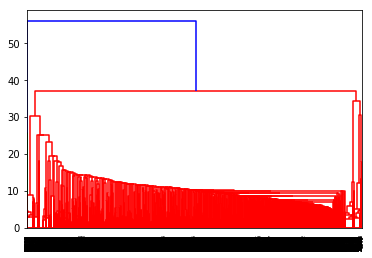

In [64]:
prob1_ag_new = linkage(satisfyBothCond_dummies_rotate, method='ward')  #Performs agglomerative clustering with SSE-Base metric     
dendrogram(prob1_ag_new)

In [65]:
list1 = [] 
list1.append([])
list1.append([])

for i in satisfyBothCond_dummies_rotateList:
    if "HashHandles_" in i:
        modified_i = i.replace("HashHandles_", "")
        list1[0].append(modified_i)

for j in prob1_SSE_based_ag_labels_List:
    list1[1].append(j)

print("Hashtag/Handle: list1[0][x]: ", list1[0][3])
print("Cluster #: list1[1][x]: ", list1[1][0])
print("Length: ", len(list1[0]))


Hashtag/Handle: list1[0][x]:  ##wheredoesthetimego
Cluster #: list1[1][x]:  2
Length:  22322


- Create dictionary to organize clusters 0-10 items:

In [66]:
key0 =  'cluster0'
key1 =  'cluster1'
key2 =  'cluster2'
key3 =  'cluster3'
key4 =  'cluster4'
key5 =  'cluster5'
key6 =  'cluster6'
key7 =  'cluster7'
key8 =  'cluster8'
key9 =  'cluster9'
key10 = 'cluster10'
    
ClusteringDict = {}

ClusteringDict.setdefault(key0, [])
ClusteringDict.setdefault(key1, [])
ClusteringDict.setdefault(key2, [])
ClusteringDict.setdefault(key3, [])
ClusteringDict.setdefault(key4, [])
ClusteringDict.setdefault(key5, [])
ClusteringDict.setdefault(key6, [])
ClusteringDict.setdefault(key7, [])
ClusteringDict.setdefault(key8, [])
ClusteringDict.setdefault(key9, [])
ClusteringDict.setdefault(key10,[])


for i in range(0,22322):
        if list1[1][i] == 0:
            ClusteringDict[key0].append(list1[0][i])
            
        elif list1[1][i] == 1:
            ClusteringDict[key1].append(list1[0][i])
        
        elif list1[1][i] == 2:
            ClusteringDict[key2].append(list1[0][i])
        
        elif list1[1][i] == 3:
            ClusteringDict[key3].append(list1[0][i])
        
        elif list1[1][i] == 4:
            ClusteringDict[key4].append(list1[0][i])
        
        elif list1[1][i] == 5:
            ClusteringDict[key5].append(list1[0][i])
        
        elif list1[1][i] == 6:
            ClusteringDict[key6].append(list1[0][i])
        
        elif list1[1][i] == 7:
            ClusteringDict[key7].append(list1[0][i])
        
        elif list1[1][i] == 8:
            ClusteringDict[key8].append(list1[0][i])
        
        elif list1[1][i] == 9:
            ClusteringDict[key9].append(list1[0][i])
        
        elif list1[1][i] == 10:
            ClusteringDict[key10].append(list1[0][i])
            

In [74]:
#print(ClusteringDict.keys())
#print(ClusteringDict)
print(ClusteringDict["cluster10"])

['#4101', '#AccesoTotalAZ', '#Agnostic', '#AltReich', '#AltRight', '#AmericaFirst', '#Americans', '#Ashley', '#Author,', '#BEATNCSTATE', '#BUILDWALL', '#BusinessCoach,', '#CarefreeBlackGirl', '#CyberThugs', '#DODT', '#DPR', '#Dad,', '#Disciple', '#DiscoveryChannel', '#Draintheswamp', '#DropoutHillary', '#FIRETERRYCOLLINS', '#Faith', '#FangFriday', '#FulfillingDestiny', '#H2P', '#HilarySupporters', '#HillaryClinton', '#ISRAEL', "#MCI's,", '#METS', '#MakeInIndia,', '#ManicMonday', '#McLaren', '#MuskratFalls', '#NRA', '#NWSL', '#NYM', '#NoleNation', '#Notorious', "#Obama's", '#OurFatherWhoArtinHeaven', '#Pitt,', '#RaiseIt', '#Rigged', '#Sad', '#SmallGovernment', '#Speaker,', '#SpiritGrowth,', '#Start-ups,', '#TRUMP2016', '#TRUMPDEPLORABLE', '#ThankYouMrWilson', '#ThirstyThursday', '#TrumpPence2016', '#USWDNT', '#UniteBlues', '#VETS', '#VesselofKek', '#WayDownWeGo', '#WriteTheCheckDon', '#addaveggiemusic', '#auctions', '#bbcstrictly', '#copolitics', '#coyr', '#donal', '#edballs', '#ffconf'

- Compare the clustering result of K-means algorithm with that of the agglomerative hierarchical clustering algorithm

In The report.

# Problem 2:

- Represent each user as a vector of integers with the frequency (i.e., how many times) a user has used each    hashtag/handle. Each row is a unique user 


In [84]:
#Reference https://stackoverflow.com/questions/37381862/get-dummies-for-pandas-column-containing-list
prob2_step1 = pd.Series(satisfyBothCond['HashHandles'].apply(pd.Series).stack().reset_index(1, drop=True), name='HH')
prob2_step2 = satisfyBothCond.join(prob2_step1).drop('HashHandles', axis=1).rename(columns={'HH': 'HashHandles'})
prob2_step3 = pd.get_dummies(prob2_step2, columns=['HashHandles'])

satisfyBothCond_dummies_prob2 = (prob2_step3).groupby('UserID', as_index=True).sum() #If we set as_index=True, it displays the userID 

satisfyBothCond_dummies_prob2.head()

HashHandles_#  HashHandles_##Houdini  HashHandles_##voteblue.  \
UserID                                                                      
1000273868  0              0                      0                         
1004887885  0              0                      0                         
10084232    0              0                      0                         
100888538   0              0                      0                         
101193997   0              0                      0                         

            HashHandles_##wheredoesthetimego  HashHandles_#$27  \
UserID                                                           
1000273868  0                                 0                  
1004887885  0                                 0                  
10084232    0                                 0                  
100888538   0                                 0                  
101193997   0                                 0                  

            HashHandles_#001  HashHandles_#1  HashHandles_#1!!!  \
UserID                                                            
1000273868  0                 0               0                   
1004887885  0                 0               0                   
10084232    0                 0               0                   
100888538   0                 0               0                   
101193997   0                 0               0                   

            HashHandles_#1)  HashHandles_#1,         ...           \
UserID                                               ...            
1000273868  0                0                       ...            
1004887885  0                0                       ...            
10084232    0                0                       ...            
100888538   0                0                       ...            
101193997   0                0                       ...            

            HashHandles_@zinc.  HashHandles_@zip90210:  \
UserID                                                   
1000273868  0                   0                        
1004887885  0                   0                        
10084232    0                   0                        
100888538   0                   0                        
101193997   0                   0                        

            HashHandles_@zittokabwe  HashHandles_@zlgoodwin97  \
UserID                                                          
1000273868  0                        0                          
1004887885  0                        0                          
10084232    0                        0                          
100888538   0                        0                          
101193997   0                        0                          

            HashHandles_@zole  HashHandles_@zonefox.  \
UserID                                                 
1000273868  0                  0                       
1004887885  0                  0                       
10084232    0                  0                       
100888538   0                  0                       
101193997   0                  0                       

            HashHandles_@zooinspectors:  HashHandles_@zrob1315  \
UserID                                                           
1000273868  0                            0                       
1004887885  0                            0                       
10084232    0                            0                       
100888538   0                            0                       
101193997   0                            0                       

            HashHandles_@zulily.  HashHandles_@zweber  
UserID                                                 
1000273868  0                     0                    
1004887885  0                     0                    
10084232    0                     0                    
100888538   0                     0                    


- Load clinton_trump_user_classes.txt file
- Class 0 corresponds to Trump followers, while class 1 corresponds to Clinton followers


In [85]:
column_Names_new = ["UserID", "BinaryValue"]
userClasses = pd.read_table("data/clinton_trump_user_classes.txt", header=None, names=column_Names_new, encoding='ISO-8859-1', dtype='str')
userClasses.head()

UserID BinaryValue
0  23716167    1         
1  1330659342  0         
2  2409166483  1         
3  245307075   1         
4  139657834   0

- Filter the users we need in the "filterClinton_trump_user_classes" based on selected users in the previous steps.

In [86]:
def filterClinton_trump_user_classes(x):
    if x in indexedSatisfyBothCondUserId:
        return "True"
    else: 
        return "False"

In [87]:
userClasses["FiltredUser"] = userClasses["UserID"].apply(filterClinton_trump_user_classes)
filterdClinton_trump_user_classes = userClasses[userClasses.FiltredUser != "False"]

filterdClinton_trump_user_classes.head()
filterdClinton_trump_user_classes.shape

(539, 3)

- indexing the BinaryValue "clinton_trump_user_classes" after filtering

In [88]:
binaryValueColumn = filterdClinton_trump_user_classes[["BinaryValue"]]
predfilterdUserClassesIndexed = binaryValueColumn['BinaryValue'].astype('int').tolist()
print(predfilterdUserClassesIndexed)

[1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

- kmeans algorithm (K=2)

In [89]:
prob2_kmeans = sk_cluster.KMeans(init='k-means++', n_clusters=2, n_init=10, max_iter=300)  
prob2_kmeansFit_predict = prob2_kmeans.fit_predict(satisfyBothCond_dummies_prob2)
print(prob2_kmeansFit_predict) 

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

- SSE-based agglomerative hierarchical clustering

In [90]:
from scipy.cluster.hierarchy import dendrogram, linkage
import sklearn.cluster as sk_cluster

prob2_sseBase_ag = sk_cluster.AgglomerativeClustering(linkage = 'ward', n_clusters = 2)   
prob2_SSE_based_ag_labels = prob2_sseBase_ag.fit_predict(satisfyBothCond_dummies_prob2)
prob2_SSE_based_ag_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1,

{'color_list': ['g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',

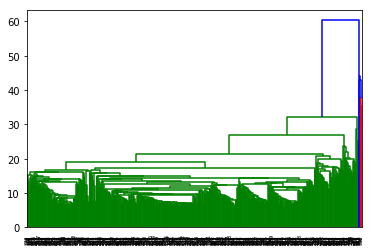

In [91]:
prob2_ag1 = linkage(satisfyBothCond_dummies_prob2, method='ward')  # Performs agglomerative clustering with SSE-Base metric     
dendrogram(prob2_ag1)  

- MAX-based agglomerative hierarchical clustering

In [92]:
prob2_ag2 = sk_cluster.AgglomerativeClustering(linkage = 'complete', n_clusters = 2)   
MAX_based_ag_labels = prob2_ag2.fit_predict(satisfyBothCond_dummies_prob2)
MAX_based_ag_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0,

{'color_list': ['g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',

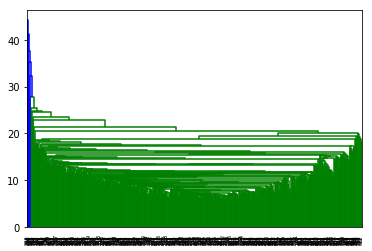

In [93]:
prob2_ag3 = linkage(satisfyBothCond_dummies_prob2, method='complete')       # Performs agglomerative clustering with MAX metric
dendrogram(prob2_ag3) 

#### Compute the confusion matrix with the ground truth, the precision, recall and F-measure for (1) the k-means algorithm, (2) MAX-based agglomerative hierarchical clustering, and (3) SSE-based agglomerative hierarchical clustering.

- 1) The k-means algorithm

In [98]:
#https://stats.stackexchange.com/questions/95209/how-can-i-interpret-sklearn-confusion-matrix
import sklearn.metrics as metrics

prob2_x_true_Kmean = predfilterdUserClassesIndexed
prob2_x_pred_Kmean = prob2_kmeansFit_predict

print("confusion_matrix: ")
print(metrics.confusion_matrix(prob2_x_true_Kmean, prob2_x_pred_Kmean))
print("Precision", metrics.precision_score(prob2_x_true_Kmean, prob2_x_pred_Kmean, average='weighted'))
print("Recall: ", metrics.recall_score(prob2_x_true_Kmean, prob2_x_pred_Kmean, average='weighted'))
print("F-Score:", metrics.f1_score(prob2_x_true_Kmean, prob2_x_pred_Kmean, average='weighted'))   

confusion_matrix: 
[[188   2]
 [346   3]]
Precision 0.512599973595
Recall:  0.354359925788
F-Score: 0.194043204799


- 2) MAX-based agglomerative hierarchical clustering

In [99]:
import sklearn.metrics as metrics

prob2_x_true_MaxB = predfilterdUserClassesIndexed
prob2_x_pred_MaxB = prob2_SSE_based_ag_labels

print("confusion_matrix: ")
print(metrics.confusion_matrix(prob2_x_true_MaxB, prob2_x_pred_MaxB))
print("Precision:", metrics.precision_score(prob2_x_true_MaxB, prob2_x_pred_MaxB, average='weighted'))
print("Recall: ", metrics.recall_score(prob2_x_true_MaxB, prob2_x_pred_MaxB, average='weighted'))    
print("F-Score:", metrics.f1_score(prob2_x_true_MaxB, prob2_x_pred_MaxB, average='weighted'))         

confusion_matrix: 
[[  2 188]
 [  3 346]]
Precision: 0.560540048502
Recall:  0.645640074212
F-Score: 0.51466777304


- 3) SSE-based agglomerative hierarchical clustering

In [100]:
import sklearn.metrics as metrics

prob2_x_true_SSEB = predfilterdUserClassesIndexed
prob2_x_pred_SSEB = MAX_based_ag_labels

print("confusion_matrix: ")
print(metrics.confusion_matrix(prob2_x_true_SSEB, prob2_x_pred_SSEB))
print("Precision:", metrics.precision_score(prob2_x_true_SSEB, prob2_x_pred_SSEB, average='weighted'))
print("Recall: ", metrics.recall_score(prob2_x_true_SSEB, prob2_x_pred_SSEB, average='weighted'))     
print("F-Score:", metrics.f1_score(prob2_x_true_SSEB, prob2_x_pred_SSEB, average='weighted'))

confusion_matrix: 
[[190   0]
 [348   1]]
Precision: 0.771985847397
Recall:  0.354359925788
F-Score: 0.187699647291


#### For k-means look at the two centers (centroids) and examine the 30 hashtags/handles with the highest values. Can you draw some conclusion from the most frequent hashtags/handles in each cluster about what differentiates the two clusters?

- First Examine the 30 hashtags/handles with the highest values (Not part of assignment- Extra Credit)

In [207]:
HashHan_highestval30 = columnHashHanFilter.HashHan.value_counts() 
HashHandsIndexedHighest30 = HashHan_highestval30.index

print(HashHandsIndexedHighest30)
HashHan_highestval30.head()

Index(['#ImWithHer', '#MAGA', '@HillaryClinton', '@realDonaldTrump', '@',
       '@realDonaldTrump:', '#UniteBlue', '@YouTube', '#Trump2016', '#',
       ...
       '@brandonnn', '@onherperiod:', '@Patbagley', '#wolfpack',
       '@RenaLovelis:', '@j_til', '@chelseashow', '#Redeye', '@NumbersUSA:',
       '#UGAvsUF'],
      dtype='object', length=18849)


#ImWithHer          224
#MAGA               219
@HillaryClinton     163
@realDonaldTrump    146
@                   143
Name: HashHan, dtype: int64

In [102]:
HashHandsIndexedHighest30List = []
for y in HashHandsIndexedHighest30[:30]:
    HashHandsIndexedHighest30List.append(y)
    
print(HashHandsIndexedHighest30List)

['#ImWithHer', '#MAGA', '@HillaryClinton', '@realDonaldTrump', '@', '@realDonaldTrump:', '#UniteBlue', '@YouTube', '#Trump2016', '#', '#TrumpPence16', '#NeverHillary', '#Trump', '#DrainTheSwamp', '@FoxNews:', '@c0nvey', '#MakeAmericaGreatAgain', '#tcot', '#1', '#WorldSeries', '@wikileaks:', '#NeverTrump', '#Hillary', '#TrumpTrain', '#NoDAPL', '@FoxNews', '@HillaryClinton:', '@CNN', '#2A', '@mitchellvii:']


- As it is displayed the value counts are sorted and we can pick first 30 as the highest. 


In [103]:
def isHanHighest30Valfun(list1):
    for x in list1:
        if x in HashHandsIndexedHighest30List:
            return "True"
        else:
            return "False"    

- use the orginal filtred data_frame from section 1.2 to repeat the process.

In [104]:
dataHashMoreThan20UniqueItems["isHanHighest30Val"] = dataHashMoreThan20UniqueItems["HashHandles"].apply(isHanHighest30Valfun)
isHanHighest30Val = dataHashMoreThan20UniqueItems[dataHashMoreThan20UniqueItems.isHanHighest30Val == "True"]
isHanHighest30Val.shape
#isHanHighest30Val.head()

(36, 5)

- indexing the isHanHighest30Val

In [105]:
isHanHighest30ValIndexed = isHanHighest30Val.index
print(len(isHanHighest30ValIndexed))

36


- clean ground truh based on new userIDs model

In [106]:
def filterClinton_trump_user_classes(x):
    if x in isHanHighest30ValIndexed:   
        return "True"
    else: 
        return "False"

In [107]:
userClasses["FiltredUser30HH"] = userClasses["UserID"].apply(filterClinton_trump_user_classes)
filterd30HHClinTrumpclasses = userClasses[userClasses.FiltredUser30HH != "False"]

filterd30HHClinTrumpclasses.head()
filterd30HHClinTrumpclasses.shape

(36, 4)

- Indexing the BianryValue column to use in confusion_matrix

In [108]:
binaryValueColumnHH30 = filterd30HHClinTrumpclasses[["BinaryValue"]]
predfil30HHUserClassesIndexed = binaryValueColumnHH30['BinaryValue'].astype('int').tolist()
print(predfil30HHUserClassesIndexed)

[1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1]


- convert to vector format

In [109]:
prob2_par2_step1 = pd.Series(isHanHighest30Val['HashHandles'].apply(pd.Series).stack().reset_index(1, drop=True), name='HH')
prob2_par2_step2 = isHanHighest30Val.join(prob2_par2_step1).drop('HashHandles', axis=1).rename(columns={'HH': 'HashHandles'})
prob2_par2_step3 = pd.get_dummies(prob2_par2_step2, columns=['HashHandles'])

dummies_df_new = (prob2_par2_step3).groupby('UserID', as_index=True).sum() #If we set as_index=True, it displays the userID 

dummies_df_new.head()

HashHandles_#  HashHandles_#1  \
UserID                                      
107190444   0              0                
1096105645  0              0                
111913571   0              0                
1208416303  0              0                
12414342    0              0                

            HashHandles_#100MostDamagingWIKILEAKS  HashHandles_#13  \
UserID                                                               
107190444   0                                      0                 
1096105645  0                                      0                 
111913571   0                                      0                 
1208416303  0                                      0                 
12414342    0                                      0                 

            HashHandles_#2  HashHandles_#2016VoteBlue  HashHandles_#213)  \
UserID                                                                     
107190444   0               0                          0                   
1096105645  0               0                          0                   
111913571   0               0                          0                   
1208416303  0               0                          0                   
12414342    0               0                          0                   

            HashHandles_#2A  HashHandles_#4FT  HashHandles_#5:  \
UserID                                                           
107190444   1                0                 0                 
1096105645  0                0                 0                 
111913571   0                0                 0                 
1208416303  0                0                 0                 
12414342    0                0                 0                 

                    ...            HashHandles_@withknives  \
UserID              ...                                      
107190444           ...            0                         
1096105645          ...            0                         
111913571           ...            0                         
1208416303          ...            0                         
12414342            ...            0                         

            HashHandles_@woodhouseb  HashHandles_@woodruffbets:  \
UserID                                                            
107190444   0                        0                            
1096105645  0                        0                            
111913571   0                        0                            
1208416303  0                        0                            
12414342    0                        0                            

            HashHandles_@wordpressdotcom  HashHandles_@wpjenna  \
UserID                                                           
107190444   0                             0                      
1096105645  0                             0                      
111913571   0                             0                      
1208416303  0                             0                      
12414342    0                             0                      

            HashHandles_@wyomobe:  HashHandles_@xeni:  HashHandles_@xmasape:  \
UserID                                                                         
107190444   0                      0                   0                       
1096105645  0                      0                   0                       
111913571   0                      0                   0                       
1208416303  0                      0                   0                       
12414342    0                      0                   0                       

            HashHandles_@yahoo7be  HashHandles_@yuvadesh  
UserID                                                    
107190444   0                      0                      
1096105645  0                      0                      
111913571   0                      0        

- new Kmean

In [110]:
kmeans1 = sk_cluster.KMeans(init='k-means++', n_clusters=2, n_init=10, max_iter=300)  
kmeansFit_predict1 = kmeans1.fit_predict(dummies_df_new)
print(kmeansFit_predict1)         

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]


In [111]:
import sklearn.metrics as metrics

newX_true_Kmean = predfil30HHUserClassesIndexed
newX_pred_Kmean = kmeansFit_predict1

print("confusion_matrix: ")
print(metrics.confusion_matrix(newX_true_Kmean, newX_pred_Kmean))

print("Precision" , metrics.precision_score(newX_true_Kmean, newX_pred_Kmean, average='weighted'))
print("Recall: " , metrics.recall_score(newX_true_Kmean, newX_pred_Kmean, average='weighted'))  
print("F-Score:" , metrics.f1_score(newX_true_Kmean, newX_pred_Kmean, average='weighted')) 

confusion_matrix: 
[[11  0]
 [24  1]]
Precision 0.790476190476
Recall:  0.333333333333
F-Score: 0.199554069119


- Selecting 30 top repeated hashtag/handles for K-mean cluster equal to 2

In [118]:
import sklearn.cluster as sk_cluster
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

prob2_kmeans_new = sk_cluster.KMeans(init='k-means++', n_clusters=2, n_init=10, max_iter=300)  
prob2_kmeansFit_predict_new = prob2_kmeans_new.fit_predict(satisfyBothCond_dummies_prob2)
print(prob2_kmeansFit_predict_new) 

print(prob2_kmeans_new.cluster_centers_)
asc_order_centroids1 = prob2_kmeans_new.cluster_centers_.argsort()    # argsort() returns the indices that would sort an array.
print(asc_order_centroids1)

des_order_centroids_new = asc_order_centroids1[:,::-1]     #  get the indices in descending order
print(des_order_centroids_new)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [209]:
# first index the dummies dataframe and then convert to list  and save in the text file
terms1 = satisfyBothCond_dummies_rotate.index.tolist()
print(terms1, '\n')
for i in range(2):
    print ("Cluster:", i)
    for ind in des_order_centroids_new[i, :]:
        print (terms1[ind])
    print()

['HashHandles_#', 'HashHandles_##Houdini', 'HashHandles_##voteblue.', 'HashHandles_##wheredoesthetimego', 'HashHandles_#$27', 'HashHandles_#001', 'HashHandles_#1', 'HashHandles_#1!!!', 'HashHandles_#1)', 'HashHandles_#1,', 'HashHandles_#1.', 'HashHandles_#10', 'HashHandles_#1009,', 'HashHandles_#100Days100Ways', 'HashHandles_#100MostDamagingWIKILEAKS', 'HashHandles_#100YearsStrong!', 'HashHandles_#100daysoftri', 'HashHandles_#101daysofwomen', 'HashHandles_#10A', 'HashHandles_#10X', 'HashHandles_#10km3x2', 'HashHandles_#10x', 'HashHandles_#11', 'HashHandles_#11433', 'HashHandles_#11b.', 'HashHandles_#12', 'HashHandles_#12-4', 'HashHandles_#129!', 'HashHandles_#12Monkeys', 'HashHandles_#12s', 'HashHandles_#12weeksofChristmas', 'HashHandles_#13', 'HashHandles_#14', 'HashHandles_#15-PT', 'HashHandles_#157', 'HashHandles_#16States', 'HashHandles_#17', 'HashHandles_#184', 'HashHandles_#186', 'HashHandles_#1880sFemminist', 'HashHandles_#18th', 'HashHandles_#19', 'HashHandles_#1987', 'HashHand

HashHandles_@FiveThirtyEight:
HashHandles_#OneJerseyOneFight
HashHandles_#Mariners
HashHandles_#OnToTheByeWeek
HashHandles_#ExDem
HashHandles_#ArtsEd
HashHandles_#ObamacareInThreeWords
HashHandles_#Obamacare
HashHandles_#Analytics
HashHandles_@WendyPrince2:
HashHandles_#DefundPlannedParenthood
HashHandles_#Etsy
HashHandles_#voice4millions
HashHandles_#MGWV
HashHandles_#HelpLA
HashHandles_#Clinton
HashHandles_#257
HashHandles_#FENDER
HashHandles_#progressive
HashHandles_#Pluralism
HashHandles_@thefworduk.
HashHandles_#Pirates
HashHandles_@ginoandtom
HashHandles_#23
HashHandles_#Pennsylvania
HashHandles_#PROLIFE
HashHandles_#quote
HashHandles_@NolteNC:
HashHandles_#Penguins
HashHandles_#Feminist
HashHandles_@NAEA
HashHandles_@WalshFreedom
HashHandles_#PatriotsNation
HashHandles_@Fahrenthold:
HashHandles_#MUNBUR
HashHandles_#Comey
HashHandles_#FBIFriday
HashHandles_#Artist
HashHandles_@amassdigital
HashHandles_#PodestaEmails19:
HashHandles_@NHL
HashHandles_#NYK
HashHandles_#Equality
HashH

HashHandles_#VoteNoProp60
HashHandles_#VoteEarly
HashHandles_#betheinspiration
HashHandles_#VirtualReality
HashHandles_#VineHallOfFame
HashHandles_#Veteran
HashHandles_#VetInspired.
HashHandles_#VeniceBeach
HashHandles_#VR
HashHandles_#VOTEGOPOUT
HashHandles_#VOTEDONALDTRUMP#makeamericagreat
HashHandles_#VOTEBLUEDOWNTHELINE
HashHandles_#VFL
HashHandles_#VAAccountability
HashHandles_#VA
HashHandles_#UpperPottsgrove
HashHandles_#WeAreStreetSmart
HashHandles_#WeAreTrump
HashHandles_#Weekend!
HashHandles_#WelcometheHolidays
HashHandles_#bcn
HashHandles_#bbcsp
HashHandles_#b
HashHandles_#awesome
HashHandles_#auspol
HashHandles_#ashes
HashHandles_#americancancersociety
HashHandles_#aisdproud
HashHandles_#afpeep;
HashHandles_#acams2016
HashHandles_#ZombieDrunkTexts
HashHandles_#ZetaPhiBeta
HashHandles_#Zeta
HashHandles_#Zeke
HashHandles_#YumForAll
HashHandles_#YourRightsOurFight
HashHandles_#YesWeStillCan
HashHandles_#YesSheCan
HashHandles_#YellowDuck
HashHandles_#YearsProject!
HashHandles_#Y

HashHandles_#itsyourmove
HashHandles_#nowyourecooking
HashHandles_@shellkillebrew:
HashHandles_#irrigation
HashHandles_#isfj
HashHandles_#isupportisrael
HashHandles_#itisagreatdaytobeaWildcat
HashHandles_#itsBRITNEYbitch
HashHandles_#itsabouttogodown
HashHandles_#internalcomms
HashHandles_#itshowyouseeit
HashHandles_#itsmelaniacrush
HashHandles_#nowplaying
HashHandles_#novels.
HashHandles_#itsouthere
HashHandles_#novels
HashHandles_#nra
HashHandles_@shellyTTW
HashHandles_#irishwriters
HashHandles_#irishjobs
HashHandles_#iphoneograp
HashHandles_@shenjecozza
HashHandles_#iovotoNo
HashHandles_#iot
HashHandles_@sherisspace
HashHandles_#investors
HashHandles_#investment
HashHandles_#investing
HashHandles_#investidurarajoy
HashHandles_#intothelight
HashHandles_#inthegutterlookingatthestars
HashHandles_#internetmusic
HashHandles_#internet
HashHandles_@lowerhudsonhoop
HashHandles_#clocksgoback
HashHandles_#cppart
HashHandles_#VMworld
HashHandles_#VOTE
HashHandles_#VOTEBLUEDOWNTHEBALLOT
HashHan

HashHandles_@BeauLaVergne
HashHandles_@BeautyPoisons:
HashHandles_@BecketAdams:
HashHandles_@BeckyLynchWWE
HashHandles_@BeeGees
HashHandles_@BeeLaxDad:
HashHandles_@Bbelchev69:
HashHandles_@rowast
HashHandles_@BauerOutage.
HashHandles_@Battlefield
HashHandles_@rowbar
HashHandles_@BarryCSwanson:
HashHandles_@BarstoolAuburn:
HashHandles_@BarstoolBigCat
HashHandles_@BarstoolBigCat:
HashHandles_@BarstoolJordie:
HashHandles_@Bart_39:
HashHandles_@Baseballswag_:
HashHandles_@BasedSexyPonder
HashHandles_@BaselYHamdan:
HashHandles_@BasimaFaysal
HashHandles_@BasketballPics:
HashHandles_@Basketballisbes:
HashHandles_@BasketsGalore:
HashHandles_@Bastille_Kate:
HashHandles_@BeeMan233:
HashHandles_@roshanjahan36:
HashHandles_@BeerMakesThree:
HashHandles_@BenSwann_
HashHandles_@BenWinslow:
HashHandles_@BenZabar
HashHandles_@Bencjacobs:
HashHandles_@BenedictEvans:
HashHandles_@Beniesta_
HashHandles_@Benioff
HashHandles_@BenjaminABock
HashHandles_@BenjaminMaltby:
HashHandles_@BenjaminNorton:
HashHandl

HashHandles_#setitalks
HashHandles_#sex."
HashHandles_@sd_fdn:
HashHandles_#sexuality,
HashHandles_#sexually
HashHandles_#s
HashHandles_#rvamayor
HashHandles_#rapper
HashHandles_#recognition
HashHandles_#recruitment
HashHandles_#redlivesmatter
HashHandles_#reentry
HashHandles_#reiders
HashHandles_#relax
HashHandles_#religion
HashHandles_#remodeled
HashHandles_#renewable
HashHandles_#renewables
HashHandles_#repealthe8th
HashHandles_#replug.
HashHandles_#reporter
HashHandles_#reprorights
HashHandles_@seanspicer:
HashHandles_#repurposed
HashHandles_#recruiting
HashHandles_#recipes
HashHandles_#respect
HashHandles_#recipe
HashHandles_#rarecoins
HashHandles_#ravens
HashHandles_#razorbacks
HashHandles_#rd
HashHandles_#rdpipeco
HashHandles_@searchwithGod:
HashHandles_#readers
HashHandles_@search4swag:
HashHandles_#ready4pornhub)
HashHandles_#realDonaldTrump
HashHandles_#realbuzzCharge2
HashHandles_#realestat...
HashHandles_#realestate
HashHandles_#realpeople
HashHandles_#rebrand
HashHandles_@

HashHandles_#HTTR
HashHandles_#HTTR4Life
HashHandles_#HTownTakeover
HashHandles_#HIV.
HashHandles_#HILLARY4PRISON....Be
HashHandles_#GuyKawasaki
HashHandles_#HILLARY2016
HashHandles_#GxFR
HashHandles_@unitedchurch:
HashHandles_#H2P
HashHandles_#HALLOWEEN
HashHandles_#HAMUKOPAMOJA
HashHandles_@unisaradio
HashHandles_#HAVEASUMMAH
HashHandles_#HBDHRC
HashHandles_#HD800
HashHandles_#HDWoodson
HashHandles_#HEALTHPLUS
HashHandles_#HFA
HashHandles_#HIAC
HashHandles_#HIAC!
HashHandles_#HILLARY
HashHandles_#HeismanHouse
HashHandles_#HellInACellPreshow
HashHandles_#GrantCardone
HashHandles_#Hoop
HashHandles_#Hope
HashHandles_#HopeInGod
HashHandles_#HorridHalloween
HashHandles_#HorrifyACartoon
HashHandles_#Horror
HashHandles_#HospitalityDesign
HashHandles_#Host
HashHandles_@uSTADIUM:
HashHandles_#Hotel
HashHandles_#Hotels
HashHandles_#HouseExperts
HashHandles_#Houses
HashHandles_#Houston
HashHandles_#HowNewYorkEats
HashHandles_#HowYaDoin
HashHandles_#HoosierLogistics
HashHandles_#Hookstraten
Hash

HashHandles_@withknives
HashHandles_#Bravery.
HashHandles_#CCB
HashHandles_@william_hart
HashHandles_#CCOT,
HashHandles_@will0032003:
HashHandles_#CCW
HashHandles_@wildlife_photo_:
HashHandles_#CChange
HashHandles_#CDCwhistleblower
HashHandles_#CDKO,
HashHandles_#CDWCampus
HashHandles_#CDWInterns
HashHandles_#CEIAG
HashHandles_@wildfirered98
HashHandles_#CETA
HashHandles_#CFB.
HashHandles_#CFC
HashHandles_@williamcarterEE
HashHandles_#CCAM
HashHandles_@wildarchaeology
HashHandles_#CBRE
HashHandles_#C
HashHandles_@willkimbley
HashHandles_@williesband
HashHandles_#CA10
HashHandles_#CA49
HashHandles_@williamtincup
HashHandles_@williamjordann:
HashHandles_#CAPrimary
HashHandles_#CARFAX
HashHandles_@williamcarterEE:
HashHandles_#CAVS2016CHAMPIONS
HashHandles_#CAWORLD
HashHandles_#CBB,
HashHandles_#CBJ
HashHandles_#CBJ.
HashHandles_#CFC.
HashHandles_@wikipetera
HashHandles_#Braves
HashHandles_#CNNSOTU
HashHandles_#CONSERVATIVE
HashHandles_#CONSTITUTIONAL
HashHandles_#COP22
HashHandles_@wikil

HashHandles_#LGBTQ.
HashHandles_#LGBTQA/Equal
HashHandles_#LGBTQIA
HashHandles_#LGBTQStraightally
HashHandles_#LGBTforHillary
HashHandles_#LGBThistoryMonth
HashHandles_#LGM
HashHandles_#LIE
HashHandles_#LIONS
HashHandles_#LITElaunch
HashHandles_@tr
HashHandles_#LGBT
HashHandles_@trailblazers
HashHandles_#L
HashHandles_#LETSGO
HashHandles_@trashnewton
HashHandles_@trapdinawrpool:
HashHandles_@tranmererovers:
HashHandles_#LADodgers
HashHandles_@train0fthoughts:
HashHandles_#LAKERS,
HashHandles_#LAL
HashHandles_#LAM
HashHandles_@trailerparkboys:
HashHandles_#LAX
HashHandles_@trailerparkboys
HashHandles_#LCHF
HashHandles_@trailblazers:
HashHandles_#LESM
HashHandles_#LET
HashHandles_#Liar
HashHandles_#LibDems
HashHandles_#KeepLeft
HashHandles_#LymeWarrior
HashHandles_#MABeaconOfHonor
HashHandles_#MAEGA
HashHandles_#MAEdu
HashHandles_#MAG
HashHandles_@tomor_raw:
HashHandles_#MAGA!
HashHandles_#MAGA,#constitution
HashHandles_@tommychong:
HashHandles_@tommivotieno
HashHandles_#MAGA:
HashHandle

HashHandles_@Twitch
HashHandles_@mollyhanmer,
HashHandles_@molly_plumm
HashHandles_@Twitter!
HashHandles_@Twitter,
HashHandles_@Twitter.
HashHandles_@Twitter...
HashHandles_@TwitterMoments:
HashHandles_@TwoGunsForHire:
HashHandles_@TxAv8r
HashHandles_@Tyfrederick7
HashHandles_@TylerDuckMTV
HashHandles_@TylerRichMusic:
HashHandles_@UKenyatta
HashHandles_@UMA.
HashHandles_@USAIsWorthIt
HashHandles_@UNSomalia
HashHandles_@UN_Albania:
HashHandles_@UN_Radio
HashHandles_@UN_Women
HashHandles_@UN_women
HashHandles_@UPFTV
HashHandles_@mollitchka
HashHandles_@mojomama29.
HashHandles_@UPTuks:
HashHandles_@UR_Ninja
HashHandles_@UR_Ninja:
HashHandles_@USA1Trump:
HashHandles_@USA1stAlways:
HashHandles_@moflavadj
HashHandles_@USAID
HashHandles_@USAID.
HashHandles_@UNWOMEN4Youth
HashHandles_@UNOCHA
HashHandles_@UMDHockey
HashHandles_@UNICEF
HashHandles_@UMNews
HashHandles_@UMaine
HashHandles_@UMich
HashHandles_@UN
HashHandles_@UN:
HashHandles_@UNDP:
HashHandles_@UNDPSo
HashHandles_@UNDfootball
HashHa

HashHandles_@TheSafestSpace
HashHandles_@TheSarahFader
HashHandles_@TheScaryNature:
HashHandles_@TheSecretAlley
HashHandles_@TheSeigeDFS
HashHandles_@TheSexology:
HashHandles_@TheShadeRoom:
HashHandles_@TheShadyMusic:
HashHandles_@TheSportsDegens
HashHandles_@TheSportsDegens:
HashHandles_@TheSpringChickn:
HashHandles_@TheStrokeAssoc
HashHandles_@moveon
HashHandles_@TheSun:
HashHandles_@TheRyanAdams:
HashHandles_@TheRoot:
HashHandles_@TheTalkCBS
HashHandles_@TheRoot
HashHandles_@TheREALRIKISHI.
HashHandles_@TheRReport:
HashHandles_@TheRapOlympics:
HashHandles_@TheRealDratch
HashHandles_@mpblackman:
HashHandles_@TheRealElvira:
HashHandles_@TheRealNews:
HashHandles_@TheRealSchnick:
HashHandles_@moyzes
HashHandles_@TheReimagining.
HashHandles_@movito
HashHandles_@TheRickyDavila:
HashHandles_@TheRickyVaughn:
HashHandles_@TheRightScoop:
HashHandles_@TheRightWayNews:
HashHandles_@TheSupremeTaco:
HashHandles_@TheTateMartell:
HashHandles_@The_JBS:
HashHandles_@TheWalkingDead
HashHandles_@TheWei

HashHandles_@jonallendc,
HashHandles_@jonareeves6127:
HashHandles_@madi_votaw:
HashHandles_@jonathanchait
HashHandles_@jonathanjewel:
HashHandles_@jonathanmahler:
HashHandles_@madeline__carl:
HashHandles_@jonjohnsonwip
HashHandles_@jonlovett:
HashHandles_@jonmladd:
HashHandles_@jonnajarian
HashHandles_@jon_wertheim:
HashHandles_@jojoh888:
HashHandles_@johnnydollar01
HashHandles_@jojoh888.
HashHandles_@madlyv:
HashHandles_@johnnysicehouse
HashHandles_@johnnysimon:
HashHandles_@johnosorio1997
HashHandles_@johnpilger
HashHandles_@johnpodesta
HashHandles_@johnpodesta:
HashHandles_@johnredwood:
HashHandles_@johnshopkins;
HashHandles_@johnsully17
HashHandles_@johnthejack
HashHandles_@madisonpanunte
HashHandles_@madimiller99
HashHandles_@joincharlie
HashHandles_@joint_chiefz
HashHandles_@jknoxville
HashHandles_@jkirchick:
HashHandles_@jkenney
HashHandles_@jeremyscahill:
HashHandles_@magicscrumpy
HashHandles_@jerome_corsi:
HashHandles_@jessah22
HashHandles_@jesseberney:
HashHandles_@jessemange

HashHandles_@dr_morton:
HashHandles_@dragracekink:
HashHandles_@drake
HashHandles_@drdrjojo
HashHandles_@dre_gree:
HashHandles_@mattablott
HashHandles_@dreamlandtea
HashHandles_@dreamwriter9
HashHandles_@dremmelqueen:
HashHandles_@drhug
HashHandles_@drift_dude
HashHandles_@drigss96
HashHandles_@drinkaboutit
HashHandles_@driverminnie
HashHandles_@drjkahn:
HashHandles_@drjonesaa:
HashHandles_@dracioppi:
HashHandles_@dr_krystal:
HashHandles_@drmattdambrosio
HashHandles_@dpjd1
HashHandles_@doodlebug0:
HashHandles_@doritos16
HashHandles_@dotjenna
HashHandles_@double_atl:
HashHandles_@dougbraithwaite's
HashHandles_@dougmillsnyt:
HashHandles_@dougralph
HashHandles_@dovorah001
HashHandles_@dovorah001:
HashHandles_@dowell_jeremy,
HashHandles_@downbyseashore
HashHandles_@downtownusa1:
HashHandles_@downwithtyranny:
HashHandles_@dpanabaker
HashHandles_@dperi84
HashHandles_@drladstantengco
HashHandles_@drmichellelarue:
HashHandles_@mattargi:
HashHandles_@mathbabedotorg:
HashHandles_@duffy74_
HashHa

HashHandles_@DellEMCServices:
HashHandles_@DevilClair
HashHandles_@DerekJamesTV
HashHandles_@DerekSpragg:
HashHandles_@Dereksnow51Snow
HashHandles_@red_tricycle
HashHandles_@DesReal
HashHandles_@DeseretNews
HashHandles_@DesertWolfPS
HashHandles_@DesiLydic
HashHandles_@Desinho21
HashHandles_@DesmondHoward
HashHandles_@DesylvaL
HashHandles_@DesylvaL:
HashHandles_@recordstoreday
HashHandles_@DevOpsSummit
HashHandles_@rebeccajoc
HashHandles_@DevexLeanAS
HashHandles_@DerekMasonYo:
HashHandles_@DerekC2016:
HashHandles_@reddit_AMA
HashHandles_@DerSPIEGEL
HashHandles_@Delo_Taylor:
HashHandles_@Deloitte
HashHandles_@Democrat_4Trump:
HashHandles_@Deneawv3Penny:
HashHandles_@reddit
HashHandles_@DenyseLake:
HashHandles_@Deorro
HashHandles_@DeplorableCBTP:
HashHandles_@DeplorableDoug
HashHandles_@reda2448
HashHandles_@DeplorableMee
HashHandles_@DeplorableTrain
HashHandles_@Deplorablefrog1:
HashHandles_@DeplorablyReal
HashHandles_@DepressedDarth:
HashHandles_@realDonaldTrump!
HashHandles_@DowdEdward

HashHandles_@Nick_Bruett:
HashHandles_@Nick_Xenophon
HashHandles_@NickdeBruyne
HashHandles_@NickdelaTorreGC:
HashHandles_@Nickthebubble
HashHandles_@NicolaSturgeon
HashHandles_@NicoleHCook:
HashHandles_@NicoleNationNS
HashHandles_@NicoleRPR
HashHandles_@NicoleScherzy
HashHandles_@Nicole_Cliffe
HashHandles_@Nicole_Cliffe:
HashHandles_@OccupyWallStNYC:
HashHandles_@Oceana:
HashHandles_@Oded121351
HashHandles_@PARCinc
HashHandles_@PARSONSARTS
HashHandles_@PBRWriter
HashHandles_@PBSLrnMedia!
HashHandles_@PBSLrnMedia:
HashHandles_@PBballskills
HashHandles_@PCsBeard
HashHandles_@PCsBeard:
HashHandles_@PDXCityClub
HashHandles_@PENamerican
HashHandles_@PEPdaily
HashHandles_@PETAUK
HashHandles_@PFAubertine
HashHandles_@PFDAgents
HashHandles_@PFTCommenter
HashHandles_@PFTompkins
HashHandles_@PARISD
HashHandles_@PARADEofCHAOS9
HashHandles_@PIB_India:
HashHandles_@PAKnightFball
HashHandles_@ntlcomedycenter
HashHandles_@nsw43
HashHandles_@Over9x6
HashHandles_@OvercoatsWooden
HashHandles_@OwenJones8

HashHandles_@Mr_Bromo:
HashHandles_@MrJKMitchell:
HashHandles_@MrGoalie35
HashHandles_@MrsBodington:
HashHandles_@MrGeorgeWallace
HashHandles_@Morning_Joe:
HashHandles_@MorrisMichaelB
HashHandles_@MortimersHole:
HashHandles_@Mosensei:
HashHandles_@MotherJones
HashHandles_@MotherJones:
HashHandles_@MouTheTactician:
HashHandles_@MoveOn:
HashHandles_@Moz:
HashHandles_@MrAthleticism:
HashHandles_@MrBeagleman
HashHandles_@MrCook_It:
HashHandles_@MrDane1982
HashHandles_@MrDane1982:
HashHandles_@MrEdTrain:
HashHandles_@Mr_Rutherford
HashHandles_@MrsFridayNext
HashHandles_@MyPowertalk:
HashHandles_@MumCongress
HashHandles_@MurielAndJasper
HashHandles_@Murielle_Taglio:
HashHandles_@MurrellsInletPh
HashHandles_@MusaTariq
HashHandles_@Muskaan016
HashHandles_@MuslimIQ:
HashHandles_@Mutemarmoset
HashHandles_@MwalimChurchill
HashHandles_@My50com:
HashHandles_@MyBeachChair
HashHandles_@MyBeachChair:
HashHandles_@MyCustomer:
HashHandles_@MyGenuineFind
HashHandles_@MyJessicaJaymes:
HashHandles_@MyNameI

HashHandles_#REDVELVET
HashHandles_#SNSD
HashHandles_#CARLYRAEJEPSEN
HashHandles_#SHINEE
HashHandles_#IOI
HashHandles_#GetWellSoonYeri
HashHandles_#TWICE
HashHandles_#SUPERJUNIOR
HashHandles_#NCT
HashHandles_#CA4Trump
HashHandles_#IAmYourVoice
HashHandles_#VoteTrump2016
HashHandles_#HesWithUS
HashHandles_@timkaine:
HashHandles_#TeamTrump
HashHandles_#writer
HashHandles_#BLACKLIVESMATTER
HashHandles_#VineHallOfFame
HashHandles_@MailOnline
HashHandles_@dcexaminer
HashHandles_#entertainment
HashHandles_#entrepreneur
HashHandles_#GreenCollar
HashHandles_@riotwomennn:
HashHandles_#TheBloggessTribe
HashHandles_#Atheist
HashHandles_#np
HashHandles_#wine
HashHandles_#books
HashHandles_#refugees
HashHandles_#HillaryEmails
HashHandles_#TheHoodForTrump
HashHandles_#M
HashHandles_#Olicity
HashHandles_@DineshDSouza
HashHandles_@OnMessageForHer:
HashHandles_@petequily
HashHandles_#KeepTexasRed
HashHandles_#ProLife
HashHandles_#alwaystrump
HashHandles_#TrumpTrain!
HashHandles_@5HonTour:
HashHandles_@

HashHandles_#LearnLAP/#TLAP
HashHandles_@ChristieC733:
HashHandles_#OcetiSakowin
HashHandles_@peterdaou:
HashHandles_#Dallas
HashHandles_#UniteBlue,
HashHandles_#DakotaAccessPi
HashHandles_@foxandfriends
HashHandles_@ggeett37aaa:
HashHandles_#Lemonade
HashHandles_@MariaBartiromo:
HashHandles_#KidsDeserveIt.
HashHandles_#mufc
HashHandles_@bluehand007
HashHandles_@globalmoneymatt
HashHandles_#COYS!
HashHandles_##Houdini
HashHandles_#economy
HashHandles_#FinTech.
HashHandles_@PMOIndia:
HashHandles_@USJLiban,
HashHandles_@MittRomney
HashHandles_@ENA_fr
HashHandles_@RobertMackey:
HashHandles_@sammynickalls:
HashHandles_#ILSEN
HashHandles_@GlenelgFC
HashHandles_#fbi
HashHandles_#EU
HashHandles_#CubsvsIndians
HashHandles_#ORPUW
HashHandles_#disvet
HashHandles_@fly2ohare
HashHandles_#BleedBlue
HashHandles_@SlackHQ
HashHandles_#BallotsBeforeBullets
HashHandles_@ORDInsider:
HashHandles_@ken_bennett:
HashHandles_#nastywoman
HashHandles_@jonnysun
HashHandles_#JordanDavis
HashHandles_@DreadChapo:
H

HashHandles_#thankslillyhanbury
HashHandles_#MookieAndBuckner!
HashHandles_@DesReal
HashHandles_@MarkSimoneNY:
HashHandles_#trumpTrain
HashHandles_@AltafBe:
HashHandles_#HBDHRC
HashHandles_@istevewilson
HashHandles_@SoundersFC
HashHandles_#wages
HashHandles_#Alien
HashHandles_#4thewin
HashHandles_@imraansiddiqi:
HashHandles_@vineofserie:
HashHandles_#VoteBlueDownBallot
HashHandles_#SinCityTimes
HashHandles_@diana_west_:
HashHandles_#digitalmarketing
HashHandles_#fearthe4
HashHandles_@v
HashHandles_@JoeHNewYork
HashHandles_@NonProfitTimes
HashHandles_@DefundMSM:
HashHandles_@Anthonypurse
HashHandles_@energyaction.
HashHandles_@My_Recipes
HashHandles_#trumptrain.
HashHandles_@MoreHits1037.
HashHandles_#1987
HashHandles_@twitchyteam
HashHandles_@magicbaltimore
HashHandles_#nonprofit
HashHandles_@goldengateblond
HashHandles_@jontum62
HashHandles_@TheBertShow.
HashHandles_@Kevysansom
HashHandles_@jonathanchait
HashHandles_#SUBSCRIBE
HashHandles_@jasminesanders
HashHandles_#GodMade
HashHandl

HashHandles_@Anon_Eu:
HashHandles_@Youth_SDG
HashHandles_@DebbieGibson
HashHandles_@kmackrn
HashHandles_#DrCyn21
HashHandles_#snowboard
HashHandles_@HansumJay
HashHandles_#10km3x2
HashHandles_@kellyhoover27:
HashHandles_@SimpsonsRemoval
HashHandles_@TLM.
HashHandles_@webticketsSA
HashHandles_@murse_nurse
HashHandles_#Drainthe
HashHandles_@hudsonhollister
HashHandles_@Ciga_FF
HashHandles_#SingKaraoke
HashHandles_@BBCLeeds
HashHandles_@PennAthletics
HashHandles_#Smule:
HashHandles_#dynastytrades
HashHandles_#sarcasmfont
HashHandles_@LAClippers
HashHandles_#Royals
HashHandles_#UNGGIM
HashHandles_@MarvelStudios:
HashHandles_@Speechexpert:
HashHandles_#UNDERRATED
HashHandles_#MakeAmericaGreatAgain#RollTide
HashHandles_@search4swag:
HashHandles_#OOTT
HashHandles_@lauraandandi
HashHandles_#ChangeAgent
HashHandles_#Letr2Jack
HashHandles_@WisDems:
HashHandles_@cultcommoncore:
HashHandles_@girlsmeg:
HashHandles_@ascarbs:
HashHandles_#1009,
HashHandles_#Trumpstory
HashHandles_@unisaradio
HashHand

HashHandles_@ConnectingUp
HashHandles_#MT
HashHandles_@SophiaBollag
HashHandles_@Pardus_UK:
HashHandles_@AndrewDBailey:
HashHandles_@SusanBrooksIN
HashHandles_@senatorbobday:
HashHandles_#FuckTheCubs
HashHandles_@PARADEofCHAOS9
HashHandles_@DavidLockeACNC:
HashHandles_#WeThePeople
HashHandles_#213)
HashHandles_@Rottweiller2000
HashHandles_@ourChloePup
HashHandles_@KeithUrban
HashHandles_@grey_ghost47
HashHandles_@texmargo:
HashHandles_@Nekoterran:
HashHandles_#MTLvNY
HashHandles_@capefearcomicon
HashHandles_@the_reeders:
HashHandles_#platedpics
HashHandles_@triggerdelete_
HashHandles_@marieluv_:
HashHandles_@hulu:
HashHandles_#TeamStro
HashHandles_#Billings
HashHandles_@aj_gtchaos:
HashHandles_@AusiMerlin
HashHandles_@BrandonJRouth
HashHandles_#SorryButTrue
HashHandles_@abc7
HashHandles_@kristinrawls:
HashHandles_#communityradio
HashHandles_@nytmetro.
HashHandles_#BudgetCutAMovie
HashHandles_@GovPenceIN
HashHandles_@thelaynee:
HashHandles_@morejordans:
HashHandles_#OpenStreetsNash!
Has

HashHandles_@SECbooger
HashHandles_@blakehounshell:
HashHandles_@jessah22
HashHandles_@martinkadelux
HashHandles_@NFL_Cowboys247:
HashHandles_@JuggMelts
HashHandles_@BilalJaffery
HashHandles_#PLL.
HashHandles_@Shedd_Aquarium.
HashHandles_@LukeBryanOnline
HashHandles_#Ellsworth316
HashHandles_@TheTrentOnline
HashHandles_@MagicalSiblings:
HashHandles_#Boxing
HashHandles_#Goldberg
HashHandles_#DonaldTrumpFor
HashHandles_#CFC.
HashHandles_@TweakYourBiz
HashHandles_#Clippers
HashHandles_#SharkTank
HashHandles_@Funky_Pankhu
HashHandles_@ChrisLarkin2:
HashHandles_@IntelligentHQ
HashHandles_@DavidRBradley
HashHandles_@WWE.
HashHandles_#HappyDhanteras
HashHandles_@ItsSonicWWE:
HashHandles_#CollegeGameDay
HashHandles_#AddAClownRuinAMovie
HashHandles_#NOChinMusic
HashHandles_#sweepstakes.
HashHandles_@JakeBentley19
HashHandles_@StrokeAssocNW
HashHandles_#NewportBeach
HashHandles_@mobile9dotcom
HashHandles_#A
HashHandles_@Trump_Commander:
HashHandles_#ID
HashHandles_@mollyhanmer,
HashHandles_#Unde

HashHandles_#FPTP
HashHandles_#RudyGiuliani
HashHandles_@fsu_atl
HashHandles_@biebersgiIinsky:
HashHandles_#RussianSchool
HashHandles_#Loser
HashHandles_#crated
HashHandles_@monkeysandmore:
HashHandles_#LAM
HashHandles_#NHRAonFOX
HashHandles_@karanjohar
HashHandles_#NHRAVegas
HashHandles_@AoDespair:
HashHandles_@SplishSplazh
HashHandles_@FaithGoldy
HashHandles_@NAHJ
HashHandles_@DeeDlisama
HashHandles_@SonOfLiberte
HashHandles_#BeautifulMind
HashHandles_@AndySteinWx
HashHandles_#Canadian
HashHandles_#HumaAbedin
HashHandles_@Giroptic,
HashHandles_#Politics.
HashHandles_@eiffelart,
HashHandles_@garrett_mixon:
HashHandles_#IE800
HashHandles_@dsstella
HashHandles_#HumaTheMole
HashHandles_#afc
HashHandles_@duchessgoldblat
HashHandles_@ericgarcetti
HashHandles_@KendallMigues:
HashHandles_@WFNYScott
HashHandles_#CleftNation
HashHandles_@katietiedrich!
HashHandles_#Darken's
HashHandles_#TrumpSupporters
HashHandles_#Overwatch
HashHandles_@DarkenProvides:
HashHandles_@EyeEm
HashHandles_@Brandon0

HashHandles_#coloringtherapy
HashHandles_#color
HashHandles_@AmyShumer
HashHandles_@TahaSSiddiqui:
HashHandles_@swaltersashby
HashHandles_@botchford
HashHandles_#Spartan.
HashHandles_@tobias_tina
HashHandles_#CantStopTheSignal
HashHandles_@fosgoodwood:
HashHandles_@TheMissingDaisy:
HashHandles_@BellaMagnani:
HashHandles_#ImStillWithHer
HashHandles_#NoOn1
HashHandles_@SecularKafir
HashHandles_#Presidency
HashHandles_@factttsss:
HashHandles_@GoodwoodRRC,
HashHandles_@fawadchaudhry
HashHandles_#thekellyfile
HashHandles_@AndreiAndrei63:
HashHandles_@GoGTSLive
HashHandles_#wine.
HashHandles_#mandalas
HashHandles_@SoulofHolySpiri
HashHandles_#inter
HashHandles_#Argentina:
HashHandles_#kravmaga
HashHandles_@AngDonlon:
HashHandles_#FREEMEDIA
HashHandles_@njerimucheru
HashHandles_@SpoilerTV:
HashHandles_@Traveling9to5er
HashHandles_@StacyBrewer18:
HashHandles_@tvippolis
HashHandles_@Arsenal,https://t.co/rdVjDfJIP9
HashHandles_#ForeverYoung
HashHandles_#NewBeginnings
HashHandles_@HouseCracka:
Ha

HashHandles_#CrookedStaff
HashHandles_@apod:
HashHandles_@europesperance:
HashHandles_@VocabuLarry
HashHandles_#Wrestlemania
HashHandles_@evanwintersauth:
HashHandles_@smileyt22
HashHandles_@Surface
HashHandles_#Ryland
HashHandles_#ZumaMustFall/
HashHandles_@EdanYago
HashHandles_@__spence__:
HashHandles_#CrookedZuma/
HashHandles_@ASU
HashHandles_@bernadettejiwa
HashHandles_@KassyDillon
HashHandles_@crimewatch202:
HashHandles_@jmcmahon1992
HashHandles_#BetsyRio
HashHandles_@brstcasux
HashHandles_@keithspeaksout
HashHandles_@BrianDAmato.
HashHandles_#RecklessAbandon
HashHandles_#phxtraffic
HashHandles_#CriminalMinds
HashHandles_#MAEGA
HashHandles_@FDUWhatsNew
HashHandles_#SmallBlockersAreStupid
HashHandles_#GreenTeaHP
HashHandles_@mintisitybits
HashHandles_@TalkNerdyWithUs
HashHandles_@RepTimRyan
HashHandles_#budgetcutamovie
HashHandles_#Sweden
HashHandles_@bwecht:
HashHandles_@LaniKaiDuck
HashHandles_@alexandreaNic13:
HashHandles_@ohiou:
HashHandles_#CorruptionSA/
HashHandles_@unsmokabI

HashHandles_@LizClaman
HashHandles_#nrx
HashHandles_#FightOn!
HashHandles_@tori_deal:
HashHandles_@kyramarat1:
HashHandles_@thetravelsuite
HashHandles_@tsrblke:
HashHandles_#GuyKawasaki
HashHandles_#data
HashHandles_@YouthAmerica
HashHandles_@CrowdfundCentre:
HashHandles_@dgould151
HashHandles_@JonPardi
HashHandles_@kristilade
HashHandles_#sogodmadeafarmer
HashHandles_@MstrBig
HashHandles_@saaxenanurag:
HashHandles_#Iran.#StopExecutionsIran
HashHandles_#database.
HashHandles_#NoTrade
HashHandles_@NumbersUSA:
HashHandles_@UKUN_NewYork
HashHandles_@Jassssssooon
HashHandles_#ABC
HashHandles_#EthnicReplacement
HashHandles_@1eyewitness
HashHandles_#BuyStrongerTogetherOnItunes
HashHandles_@vomsy:
HashHandles_#coldbrew
HashHandles_@KeithHelix
HashHandles_@CliffWilkin:
HashHandles_@UTmikeperrin
HashHandles_@CatchaRUSSpy
HashHandles_@BlissTabitha:
HashHandles_@grantpankratz
HashHandles_@getnickwright:
HashHandles_#360
HashHandles_@JessMontgmryXXX
HashHandles_@Carly99340546:
HashHandles_@CoachLe

HashHandles_@jennamille12:
HashHandles_@shawnaldridge
HashHandles_@BarbaraBoxe
HashHandles_#BringBackNajeeb
HashHandles_@greg52451:
HashHandles_#MassHole
HashHandles_@OldeEire:
HashHandles_@Oldfirmfacts1:
HashHandles_#colonization
HashHandles_#banhospitalfoodcarcinogens
HashHandles_@Rodaintl
HashHandles_@jimmy9_girl:
HashHandles_#doglover
HashHandles_@BETTIUNHCR:
HashHandles_@PiperKennetta:
HashHandles_@CoreyGloor:
HashHandles_@isteconnects
HashHandles_#GOS
HashHandles_@seziberat
HashHandles_@BernieTatro
HashHandles_#WomenForRum
HashHandles_@hlonimajola
HashHandles_@esglaude:
HashHandles_#awardwinningkidlitauthor
HashHandles_@j_akerader
HashHandles_#Bruinsnation
HashHandles_#FridayF
HashHandles_@ipheebzz:
HashHandles_@jltemperly
HashHandles_@fiyahlitmag
HashHandles_#Media,
HashHandles_@BridgewaterHall
HashHandles_@grammypags1
HashHandles_@fiyahlitmag:
HashHandles_@ProfFrancesca
HashHandles_@ProfTimStephens:
HashHandles_@RaezillaHockey
HashHandles_@Axikor2:
HashHandles_@thefemaleboook:


HashHandles_#mentalillness
HashHandles_#rogerthecat
HashHandles_#Canberra
HashHandles_#SwachBharatSwasthBharat
HashHandles_@AnthonyVVeiner
HashHandles_#Swayamsewaks
HashHandles_@KatiePavlich
HashHandles_@WLTX
HashHandles_#POWERBALLpermanentvacay
HashHandles_@KdyGAA
HashHandles_@RepRubenGallego
HashHandles_@DVATW
HashHandles_@roboeamerican:
HashHandles_@kate_dorierosie:
HashHandles_#happyweekend
HashHandles_@rvandiepen
HashHandles_@NickdelaTorreGC:
HashHandles_@FLGovScott
HashHandles_#BoundByBlue.
HashHandles_#IMWITHHER
HashHandles_@TheYoungTurks;
HashHandles_#WeAreMoreThanShoes
HashHandles_#ALDUBCoupleTrouble
HashHandles_#politicianawards16.
HashHandles_@ChemiShalev:
HashHandles_@SouleFacts:
HashHandles_@GodLovesSchlubs:
HashHandles_@SpartanMaker:
HashHandles_#ammosexuals,
HashHandles_@Change_Britain:
HashHandles_@NoahGrayCNN:
HashHandles_#NetDE
HashHandles_@Proud
HashHandles_@RepKenBuck
HashHandles_@cmuhcii
HashHandles_@TweetLlkeAGuy:
HashHandles_@EjmAlrai
HashHandles_@xtina,
HashHand

HashHandles_@sunxnes
HashHandles_@emineno435:
HashHandles_@UglyMugPottery.
HashHandles_@BorisNChuryk
HashHandles_@DadyChery:
HashHandles_@entrepreneur
HashHandles_@calumfeatures:
HashHandles_@calstampeders
HashHandles_@andrewjmichaud
HashHandles_@unbotheredb
HashHandles_@VidyaZrutaSampn:
HashHandles_@Dope_Dodge:
HashHandles_@TypeKacee2:
HashHandles_@Vitico46
HashHandles_@WayneRoot:
HashHandles_#TeamFynSports
HashHandles_#TOTWArmy
HashHandles_@crissles:
HashHandles_@CTVMorningLive,
HashHandles_@ByronSwartz1
HashHandles_@therealeSTDan
HashHandles_@BeachesResorts
HashHandles_#Harry
HashHandles_@WOSNScores:
HashHandles_#LoseWeight
HashHandles_@MarstonGroup
HashHandles_@DocMellyMel
HashHandles_#MatthewHait
HashHandles_#NASASocial
HashHandles_@allisonsbeggs
HashHandles_#MVPHour
HashHandles_#SocialSchool4EDU
HashHandles_#Longhorns
HashHandles_@MakeItPlain:
HashHandles_@andreagribble:
HashHandles_@MileHighSports
HashHandles_@NPRinskeep:
HashHandles_#D30
HashHandles_#157
HashHandles_@tsiro
Hash

HashHandles_#BenazirBhuttoLeader
HashHandles_@LanaSweetenShul:
HashHandles_#EMA
HashHandles_#Students4Trump
HashHandles_@Angel_Angela_D
HashHandles_@FSU_HESA
HashHandles_@massimobottura
HashHandles_#Passionate
HashHandles_@MetallicKaty
HashHandles_#Cavsfan
HashHandles_@AdamSchefter.
HashHandles_@weegingerdug
HashHandles_@Baseballswag_:
HashHandles_@OldBroad4Bernie
HashHandles_@BEN
HashHandles_#BALTIMORE
HashHandles_#StrongerWithoutHer
HashHandles_@soophhhh
HashHandles_@UntappedCities
HashHandles_@TurkishMinuteTM:
HashHandles_#PoliticsAPlay
HashHandles_#LeadershipDevelopment
HashHandles_@hugva3:
HashHandles_@inthesetimesmag.
HashHandles_#success?
HashHandles_@weeklydish.
HashHandles_#thingsthatannoyme
HashHandles_@Macys
HashHandles_@GooglePlayMusic:
HashHandles_@VML
HashHandles_@QueeringPsych:
HashHandles_#ravens
HashHandles_@hour_detroit.
HashHandles_@annabella313
HashHandles_@Who_NJ3:
HashHandles_@speedprayers
HashHandles_#USF
HashHandles_@cumagazine
HashHandles_#prison,
HashHandles_@

HashHandles_@ariberman
HashHandles_@archiveis
HashHandles_@aramfloodmusic
HashHandles_@ar1511c
HashHandles_@aqusaiba
HashHandles_@Citrix
HashHandles_@aorpodcast:
HashHandles_@City_Bureau.
HashHandles_@CityofBangorME.
HashHandles_@CityofBudaTX:
HashHandles_@annafarhot.
HashHandles_@CityofSanJose
HashHandles_@Codecademy
HashHandles_@CohenTisha:
HashHandles_@Coinsecure
HashHandles_@ambertamblyn's
HashHandles_@Coinsecure:
HashHandles_#MadeInAmerica
HashHandles_#DebHeads
HashHandles_@TheNotoriousMMA:
HashHandles_@allisonn444:
HashHandles_@alliance4solar:
HashHandles_@ComfortablySmug:
HashHandles_@allahpundit
HashHandles_@alisonmkrae:
HashHandles_@alicia2120
HashHandles_@Cinemablend.
HashHandles_@asadowai
HashHandles_@bbyfuI:
HashHandles_@ash1bce
HashHandles_#DFW
HashHandles_#DGJ
HashHandles_@CarDealerEd
HashHandles_@bbclaurak:
HashHandles_@bbcarts
HashHandles_#DJs
HashHandles_@bballbreakdown.
HashHandles_@bart:
HashHandles_@CarlosCruz2016:
HashHandles_@barronlerner:
HashHandles_@bankillerro

- load the saved clueres data from text files:

In [200]:
column_Names_new = ["Hashtag_Handle"]
to30HHCluster0 = pd.read_table("data/30topKmeancluster0.txt", header=None, names=column_Names_new, encoding='ISO-8859-1', dtype='str')
to30HHKmean.head()

Hashtag_Handle
0  HashHandles_#MAGA           
1  HashHandles_#ImWithHer      
2  HashHandles_@HillaryClinton 
3  HashHandles_@               
4  HashHandles_@realDonaldTrump

In [205]:
cluster0_val_count = to30HHCluster0.Hashtag_Handle.value_counts()
cluster0_val_count_indexed = cluster0_val_count.index

print(cluster0_val_count_indexed)
cluster0_val_count.head()

Index(['HashHandles_#ReasonsIDontBelieveInAGodConstructedByDeeplyFlawedHumans',
       'HashHandles_#AngelsFamily.', 'HashHandles_@morningmoneyben',
       'HashHandles_#GreenIsTheNewBlue', 'HashHandles_@FAlTHXO:',
       'HashHandles_@ajaxdailydotcom', 'HashHandles_@kkalmes2',
       'HashHandles_@JennaLeeUSA', 'HashHandles_#Cloud',
       'HashHandles_#riskmanagement',
       ...
       'HashHandles_@dragracekink:', 'HashHandles_@sacramentokings',
       'HashHandles_@MoeedNj:', 'HashHandles_@brguerrero:',
       'HashHandles_@JessicaWSYX6', 'HashHandles_#BrooklynGrit',
       'HashHandles_@DannyDunn11:', 'HashHandles_@iHayaaaa_:',
       'HashHandles_#EU,', 'HashHandles_@NAHJ'],
      dtype='object', length=22322)


HashHandles_#ReasonsIDontBelieveInAGodConstructedByDeeplyFlawedHumans    1
HashHandles_#AngelsFamily.                                               1
HashHandles_@morningmoneyben                                             1
HashHandles_#GreenIsTheNewBlue                                           1
HashHandles_@FAlTHXO:                                                    1
Name: Hashtag_Handle, dtype: int64

In [206]:
cluster0List = []

for x in cluster0_val_count_indexed[:30]:
    cluster0List.append(x)
    
print(cluster0List)

['HashHandles_#ReasonsIDontBelieveInAGodConstructedByDeeplyFlawedHumans', 'HashHandles_#AngelsFamily.', 'HashHandles_@morningmoneyben', 'HashHandles_#GreenIsTheNewBlue', 'HashHandles_@FAlTHXO:', 'HashHandles_@ajaxdailydotcom', 'HashHandles_@kkalmes2', 'HashHandles_@JennaLeeUSA', 'HashHandles_#Cloud', 'HashHandles_#riskmanagement', 'HashHandles_@ToddyFur', 'HashHandles_@AkshulyIzLauren:', 'HashHandles_#Liberty,', 'HashHandles_@timesrecor', 'HashHandles_@4TheJerseyKid:', 'HashHandles_@Chizzy_GetsBusy', 'HashHandles_#Love', 'HashHandles_#Maine', 'HashHandles_@IntThings:', 'HashHandles_@ben1283:', 'HashHandles_@Maritime_Evans:', 'HashHandles_@KonstantinKlug:', 'HashHandles_@RaqiyahMays:', 'HashHandles_@SK_TheKing_:', 'HashHandles_@NaYaKnoMi:', 'HashHandles_@jeffpeguescbs:', 'HashHandles_@MarketWatch:', 'HashHandles_@o2farms_sk', 'HashHandles_#S', 'HashHandles_@kelownagoose:']


In [126]:
column_Names_new = ["Hashtag_Handle"]
to30HHCluster1 = pd.read_table("data/30topKmeancluster1.txt", header=None, names=column_Names_new, encoding='ISO-8859-1', dtype='str')
to30HHKmean.head()

Hashtag_Handle
0  HashHandles_#MAGA           
1  HashHandles_#ImWithHer      
2  HashHandles_@HillaryClinton 
3  HashHandles_@               
4  HashHandles_@realDonaldTrump

In [210]:
cluster1_val_count = to30HHCluster1.Hashtag_Handle.value_counts()
cluster1_val_count_indexed = cluster1_val_count.index

print(cluster1_val_count_indexed)
cluster1_val_count.head()

Index(['HashHandles_#content.', 'HashHandles_@emmariteladies:',
       'HashHandles_@Vikasreports', 'HashHandles_#sunshine',
       'HashHandles_#freetibet', 'HashHandles_@RobertAlai',
       'HashHandles_#SpiritGrowth,', 'HashHandles_@PSUCurleyCenter',
       'HashHandles_#BMCapitalMunich', 'HashHandles_@politico:',
       ...
       'HashHandles_@PABEvents', 'HashHandles_#ObamacareFail',
       'HashHandles_#NationalSecurity.', 'HashHandles_#DemExit',
       'HashHandles_#Benedict', 'HashHandles_@KellyAyotte',
       'HashHandles_@MewliSoftware', 'HashHandles_@williamcarterEE',
       'HashHandles_#PetParent', 'HashHandles_@NAHJ'],
      dtype='object', length=22322)


HashHandles_#content.           1
HashHandles_@emmariteladies:    1
HashHandles_@Vikasreports       1
HashHandles_#sunshine           1
HashHandles_#freetibet          1
Name: Hashtag_Handle, dtype: int64

In [211]:
cluster1List = []

for z in cluster1_val_count_indexed[:30]:
    cluster1List.append(z)
    
print(cluster1List)

['HashHandles_#content.', 'HashHandles_@emmariteladies:', 'HashHandles_@Vikasreports', 'HashHandles_#sunshine', 'HashHandles_#freetibet', 'HashHandles_@RobertAlai', 'HashHandles_#SpiritGrowth,', 'HashHandles_@PSUCurleyCenter', 'HashHandles_#BMCapitalMunich', 'HashHandles_@politico:', 'HashHandles_@DrPhilGoff:', 'HashHandles_@TimWilsonCPA:', 'HashHandles_@MAGA3X', 'HashHandles_@unfo', 'HashHandles_@ABCPolitics:', 'HashHandles_@TheIntell', 'HashHandles_@ch2daybreak', 'HashHandles_@bleedingcool:', 'HashHandles_@bagelburrito', 'HashHandles_#IAmTheWLTaskForce', 'HashHandles_@chronic_mom', 'HashHandles_@JosephMRyan1:', 'HashHandles_#nobody-matters', 'HashHandles_@RichardGrenell:', 'HashHandles_#neverHillary', 'HashHandles_@CentralParkNYC', 'HashHandles_#SAILINGTEAM', 'HashHandles_@1PRCNT', 'HashHandles_@PittFanSince63', 'HashHandles_@World_Wide_Wob:']
